# –ü—Ä–æ–µ–∫—Ç: –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## –ß–∞—Å—Ç—å 1. –ó–Ω–∞–∫–æ–º—Å—Ç–≤–æ —Å –¥–∞–Ω–Ω—ã–º–∏, –æ–±—Ä–∞–±–æ—Ç–∫–∞ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –∏ –≤—ã–±—Ä–æ—Å–æ–≤

### –ó–∞–¥–∞–Ω–∏–µ 1

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Bank/bank_fin.csv', sep = ';')

In [ ]:
# –ü—Ä–æ–≤–µ—Ä–∫–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø–æ –∫–∞–∂–¥–æ–º—É —Å—Ç–æ–ª–±—Ü—É
df.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance      25
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

In [ ]:
# –í—ã–≤–æ–¥ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∏ –¥–æ–ª–∏ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø–æ –∫–∞–∂–¥–æ–º—É –ø—Ä–∏–∑–Ω–∞–∫—É
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

# –û–±—ä–µ–¥–∏–Ω—ë–Ω–Ω–∞—è —Ç–∞–±–ª–∏—Ü–∞
missing_table = pd.DataFrame({
    '–ü—Ä–æ–ø—É—â–µ–Ω–æ': missing,
    '–ü—Ä–æ—Ü–µ–Ω—Ç (%)': missing_percent
})

# –§–∏–ª—å—Ç—Ä—É–µ–º —Ç–æ–ª—å–∫–æ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏
missing_table = missing_table[missing_table['–ü—Ä–æ–ø—É—â–µ–Ω–æ'] > 0]
missing_table

–ü—Ä–æ–ø—É—â–µ–Ω–æ  –ü—Ä–æ—Ü–µ–Ω—Ç (%)
balance         25     0.223974

### –ó–∞–¥–∞–Ω–∏–µ 2

In [ ]:
# –£–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ –ø—Ä–∏–∑–Ω–∞–∫–µ job
print(df['job'].unique())

['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']


In [ ]:
# –°–∫–æ–ª—å–∫–æ —Å—Ç—Ä–æ–∫ —Å job == 'unknown'
df[df['job'] == 'unknown'].shape[0]

70

### –ó–∞–¥–∞–Ω–∏–µ 3

In [ ]:
df.dtypes

age            int64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
deposit       object
dtype: object

In [ ]:
# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º balance –≤ —Å—Ç—Ä–æ–∫—É, —É–±–∏—Ä–∞–µ–º –ª–∏—à–Ω–µ–µ –∏ –º–µ–Ω—è–µ–º –∑–∞–ø—è—Ç—ã–µ –Ω–∞ —Ç–æ—á–∫–∏ (–µ—Å–ª–∏ –µ—Å—Ç—å)
df['balance'] = df['balance'].astype(str).str.replace(',', '.').str.replace(' ', '')

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ float
df['balance'] = pd.to_numeric(df['balance'], errors='coerce')

In [ ]:
df['balance'].dtype

dtype('float64')

### –ó–∞–¥–∞–Ω–∏–µ 4

In [ ]:
# –ó–∞–Ω–æ–≤–æ —á–∏—Ç–∞–µ–º —Ñ–∞–π–ª
df = pd.read_csv('/content/drive/MyDrive/Bank/bank_fin.csv', sep=';')

# –°–º–æ—Ç—Ä–∏–º –ø–µ—Ä–≤—É—é —Å—ã—Ä—É—é —Å—Ç—Ä–æ–∫—É
print("–°—ã—Ä–∞—è —Å—Ç—Ä–æ–∫–∞ balance:", repr(df['balance'].iloc[0]))

# –û—á–∏—â–∞–µ–º balance:
# 1. –£–¥–∞–ª–∏–º –≤—Å—ë, –∫—Ä–æ–º–µ —Ü–∏—Ñ—Ä, –∑–∞–ø—è—Ç—ã—Ö, —Ç–æ—á–µ–∫, –º–∏–Ω—É—Å–æ–≤
# 2. –ó–∞–º–µ–Ω–∏–º –∑–∞–ø—è—Ç—É—é –Ω–∞ —Ç–æ—á–∫—É
df['balance'] = df['balance'].astype(str)
df['balance'] = df['balance'].str.replace(r'[^\d,.-]', '', regex=True)
df['balance'] = df['balance'].str.replace(',', '.', regex=False)

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ float
df['balance'] = pd.to_numeric(df['balance'], errors='coerce')

# –ü—Ä–æ–≤–µ—Ä–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
print("–ü–æ—Å–ª–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è:")
print(df['balance'].head(10))
print("–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π:", df['balance'].isnull().sum())

–°—ã—Ä–∞—è —Å—Ç—Ä–æ–∫–∞ balance: ' 2 343,00 $ '
–ü–æ—Å–ª–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è:
0    2343.0
1      45.0
2    1270.0
3    2476.0
4     184.0
5       0.0
6     830.0
7     545.0
8       1.0
9       NaN
Name: balance, dtype: float64
–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π: 25


In [ ]:
# –ó–∞–ø–æ–ª–Ω—è–µ–º –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –º–µ–¥–∏–∞–Ω–æ–π
df['balance'] = df['balance'].fillna(df['balance'].median())

# –ü—Ä–æ–≤–µ—Ä—è–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
print("‚úÖ –ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø–æ—Å–ª–µ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è:", df['balance'].isnull().sum())

‚úÖ –ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø–æ—Å–ª–µ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è: 0


### –ó–∞–¥–∞–Ω–∏–µ 5

In [ ]:
# –æ–±—Ä–∞–±–æ—Ç–∞–π—Ç–µ –ø—Ä–æ–ø—É—Å–∫–∏ –≤ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö: job –∏ education, –∑–∞–º–µ–Ω–∏–≤ –∏—Ö –Ω–∞ –º–æ–¥–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
print("job ‚Äî 'unknown':", df['job'].value_counts().get('unknown', 0))
print("education ‚Äî 'unknown':", df['education'].value_counts().get('unknown', 0))

job ‚Äî 'unknown': 70
education ‚Äî 'unknown': 497


In [ ]:
job_mode = df['job'].mode()[0]
edu_mode = df['education'].mode()[0]
print("–ú–æ–¥–∞ –¥–ª—è job:", job_mode)
print("–ú–æ–¥–∞ –¥–ª—è education:", edu_mode)

–ú–æ–¥–∞ –¥–ª—è job: management
–ú–æ–¥–∞ –¥–ª—è education: secondary


In [ ]:
df['job'] = df['job'].replace('unknown', job_mode)
df['education'] = df['education'].replace('unknown', edu_mode)

In [ ]:
print("job ‚Äî 'unknown':", df['job'].value_counts().get('unknown', 0))
print("education ‚Äî 'unknown':", df['education'].value_counts().get('unknown', 0))

job ‚Äî 'unknown': 0
education ‚Äî 'unknown': 0


### –ó–∞–¥–∞–Ω–∏–µ 6

In [ ]:
# –í—ã—á–∏—Å–ª—è–µ–º –≥—Ä–∞–Ω–∏—Ü—ã –ø–æ IQR
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# –§–∏–ª—å—Ç—Ä—É–µ–º —Ç–æ–ª—å–∫–æ –Ω–æ—Ä–º–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
df = df[(df['balance'] >= lower_bound) & (df['balance'] <= upper_bound)]

# –ü—Ä–æ–≤–µ—Ä–∫–∞
print("‚úÖ –ë–∞–ª–∞–Ω—Å –ø–æ—Å–ª–µ —É–¥–∞–ª–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤:")
print("–ú–∏–Ω–∏–º—É–º:", df['balance'].min())
print("–ú–∞–∫—Å–∏–º—É–º:", df['balance'].max())
print("–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞:", df.shape)

‚úÖ –ë–∞–ª–∞–Ω—Å –ø–æ—Å–ª–µ —É–¥–∞–ª–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤:
–ú–∏–Ω–∏–º—É–º: -2049.0
–ú–∞–∫—Å–∏–º—É–º: 4063.0
–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞: (10105, 17)


## –ß–∞—Å—Ç—å 2:  –†–∞–∑–≤–µ–¥—ã–≤–∞—Ç–µ–ª—å–Ω—ã–π –∞–Ω–∞–ª–∏–∑

### –ó–∞–¥–∞–Ω–∏–µ 1

–°–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤:
deposit
no     5424
yes    4681
Name: count, dtype: int64


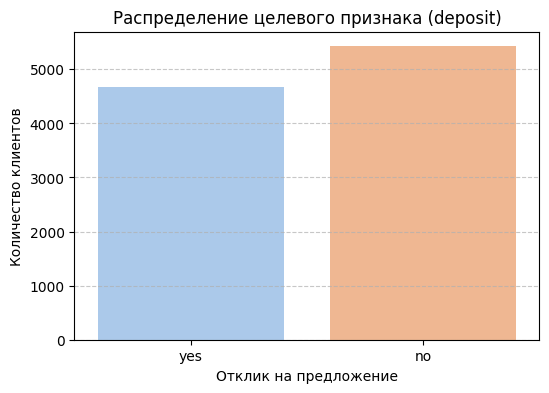

In [ ]:
# –ü–æ–¥—Å—á—ë—Ç –∑–Ω–∞—á–µ–Ω–∏–π
class_counts = df['deposit'].value_counts()
print("–°–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤:")
print(class_counts)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è ‚Äî barplot
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='deposit', palette='pastel')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ (deposit)')
plt.xlabel('–û—Ç–∫–ª–∏–∫ –Ω–∞ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### –ó–∞–¥–∞–Ω–∏—è 2 –∏ 3

In [ ]:
# –°–º–æ—Ç—Ä–∏–º —á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
df.select_dtypes(include=['int64', 'float64']).columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [ ]:
# –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–º –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º
df.describe()

age       balance           day      duration      campaign  \
count  10105.000000  10105.000000  10105.000000  10105.000000  10105.000000   
mean      40.895497    807.653538     15.590302    368.742603      2.517170   
std       11.734931    994.151966      8.441510    346.651524      2.707159   
min       18.000000  -2049.000000      1.000000      2.000000      1.000000   
25%       32.000000     95.000000      8.000000    137.000000      1.000000   
50%       38.000000    445.000000     15.000000    252.000000      2.000000   
75%       48.000000   1227.000000     22.000000    490.000000      3.000000   
max       95.000000   4063.000000     31.000000   3881.000000     43.000000   

              pdays      previous  
count  10105.000000  10105.000000  
mean      51.319644      0.816230  
std      109.644179      2.243795  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%        2.000000      1.000000  
max      854.000000     58.000000

In [ ]:
# –ë–æ–ª–µ–µ —á–∏—Ç–∞–±–µ–ª—å–Ω—ã–π –≤–∞—Ä–∏–∞–Ω—Ç, –æ–∫—Ä—É–≥–ª–µ–Ω–∏–µ
df.describe().T.round(2)

count    mean     std     min    25%    50%     75%     max
age       10105.0   40.90   11.73    18.0   32.0   38.0    48.0    95.0
balance   10105.0  807.65  994.15 -2049.0   95.0  445.0  1227.0  4063.0
day       10105.0   15.59    8.44     1.0    8.0   15.0    22.0    31.0
duration  10105.0  368.74  346.65     2.0  137.0  252.0   490.0  3881.0
campaign  10105.0    2.52    2.71     1.0    1.0    2.0     3.0    43.0
pdays     10105.0   51.32  109.64    -1.0   -1.0   -1.0     2.0   854.0
previous  10105.0    0.82    2.24     0.0    0.0    0.0     1.0    58.0

### –û–ø–∏—Å–∞—Ç–µ–ª—å–Ω—ã–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

#### 1. `age`
- –°—Ä–µ–¥–Ω–∏–π –≤–æ–∑—Ä–∞—Å—Ç –∫–ª–∏–µ–Ω—Ç–∞: **40.9 –ª–µ—Ç**
- –î–∏–∞–ø–∞–∑–æ–Ω: –æ—Ç **18** –¥–æ **95 –ª–µ—Ç**
- –ú–µ–¥–∏–∞–Ω–∞ (38) < —Å—Ä–µ–¥–Ω–µ–µ ‚Äî —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å–ª–µ–≥–∫–∞ —Å–∫–æ—à–µ–Ω–æ –≤–ø—Ä–∞–≤–æ (–≤ —Å—Ç–æ—Ä–æ–Ω—É –ø–æ–∂–∏–ª—ã—Ö)
- –ë–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤ ‚Äî –≤ –≤–æ–∑—Ä–∞—Å—Ç–µ –æ—Ç **32 –¥–æ 48 –ª–µ—Ç**

#### 2. `balance`
- –°—Ä–µ–¥–Ω–∏–π –±–∞–ª–∞–Ω—Å: **807.7**
- –î–∏–∞–ø–∞–∑–æ–Ω: –æ—Ç **‚Äì2049** –¥–æ **4063** (—Ä–∞–Ω–µ–µ —É–∂–µ –æ–±—Ä–∞–±–æ—Ç–∞–ª–∏ –≤—ã–±—Ä–æ—Å—ã)
- –í—ã—Å–æ–∫–æ–µ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ (994.2) –≥–æ–≤–æ—Ä–∏—Ç –æ —Å–∏–ª—å–Ω–æ–π —Ä–∞–∑–Ω–æ—Å—Ç–∏ –≤ –¥–æ—Ö–æ–¥–∞—Ö
- –ú–µ–¥–∏–∞–Ω–∞ (**445**) –º–µ–Ω—å—à–µ —Å—Ä–µ–¥–Ω–µ–≥–æ ‚Äî –µ—Å—Ç—å –Ω–µ–∫–æ—Ç–æ—Ä–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å –∫—Ä—É–ø–Ω—ã–º–∏ —Å—á–µ—Ç–∞–º–∏

#### 3. `day` (–¥–µ–Ω—å –º–µ—Å—è—Ü–∞, –∫–æ–≥–¥–∞ –±—ã–ª –∫–æ–Ω—Ç–∞–∫—Ç)
- –°—Ä–µ–¥–Ω–µ–µ: **15.6**, –¥–∏–∞–ø–∞–∑–æ–Ω: **1‚Äì31**
- –≠—Ç–æ –Ω–µ –ø–æ–ª–µ–∑–Ω—ã–π –ø—Ä–µ–¥–∏–∫—Ç–æ—Ä —Å–∞–º –ø–æ —Å–µ–±–µ, –Ω–æ –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–≤—è–∑–∞–Ω —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∏–≤–Ω–æ—Å—Ç—å—é –≤ –Ω–∞—á–∞–ª–µ –∏–ª–∏ –≤ –∫–æ–Ω—Ü–µ –º–µ—Å—è—Ü–∞

#### 4. `duration` (–¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ –∫–æ–Ω—Ç–∞–∫—Ç–∞)
- –°—Ä–µ–¥–Ω—è—è –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å: **368.7 —Å–µ–∫—É–Ω–¥ (~6 –º–∏–Ω—É—Ç)**
- –î–∏–∞–ø–∞–∑–æ–Ω: –æ—Ç **2** –¥–æ **3881 —Å–µ–∫—É–Ω–¥ (~1 —á–∞—Å!)**
- –í–ê–ñ–ù–û: —ç—Ç–æ—Ç –ø—Ä–∏–∑–Ω–∞–∫ **–Ω–µ –º–æ–∂–µ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏ –º–æ–¥–µ–ª–∏**, —Ç–∞–∫ –∫–∞–∫ –æ–Ω –∏–∑–≤–µ—Å—Ç–µ–Ω **—Ç–æ–ª—å–∫–æ –ø–æ—Å–ª–µ –∫–æ–Ω—Ç–∞–∫—Ç–∞**
- –¢–µ–º –Ω–µ –º–µ–Ω–µ–µ, –æ–Ω –º–æ–∂–µ—Ç –±—ã—Ç—å –ø–æ–ª–µ–∑–µ–Ω –ø—Ä–∏ –∞–Ω–∞–ª–∏–∑–µ –ø–æ–≤–µ–¥–µ–Ω–∏—è –∫–ª–∏–µ–Ω—Ç–æ–≤

#### 5. `campaign` (–∫–æ–ª-–≤–æ –∫–æ–Ω—Ç–∞–∫—Ç–æ–≤ –≤ —Ç–µ–∫—É—â–µ–π –∫–∞–º–ø–∞–Ω–∏–∏)
- –°—Ä–µ–¥–Ω–µ–µ: **2.52**, –º–µ–¥–∏–∞–Ω–∞: **2**, –º–∞–∫—Å–∏–º—É–º: **43**
- –ë–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤ –ø–æ–ª—É—á–∞–ª–∏ **1‚Äì3 –∫–æ–Ω—Ç–∞–∫—Ç–∞**
- –ó–Ω–∞—á–µ–Ω–∏–µ `43` ‚Äî –≤–æ–∑–º–æ–∂–Ω—ã–π –≤—ã–±—Ä–æ—Å –∏–ª–∏ –æ—á–µ–Ω—å –Ω–∞—Å—Ç–æ–π—á–∏–≤—ã–π –º–∞—Ä–∫–µ—Ç–∏–Ω–≥ üòÖ

#### 6. `pdays` (–∫–æ–ª-–≤–æ –¥–Ω–µ–π —Å –º–æ–º–µ–Ω—Ç–∞ –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ –∫–æ–Ω—Ç–∞–∫—Ç–∞)
- –ó–Ω–∞—á–µ–Ω–∏–µ **-1** –æ–∑–Ω–∞—á–∞–µ—Ç "–Ω–∏–∫–æ–≥–¥–∞ –Ω–µ –∫–æ–Ω—Ç–∞–∫—Ç–∏—Ä–æ–≤–∞–ª–∏"
- –ë–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤ (–ø–æ –º–µ–¥–∏–∞–Ω–µ –∏ 25/75 –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—è–º) –∏–º–µ—é—Ç `-1`, –∑–Ω–∞—á–∏—Ç **–Ω–æ–≤—ã–µ –∫–ª–∏–µ–Ω—Ç—ã**
- –ú–∞–∫—Å–∏–º—É–º: **854 –¥–Ω—è (~2.3 –≥–æ–¥–∞)**

#### 7. `previous` (—á–∏—Å–ª–æ –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö –∫–æ–Ω—Ç–∞–∫—Ç–æ–≤ –¥–æ —Ç–µ–∫—É—â–µ–π –∫–∞–º–ø–∞–Ω–∏–∏)
- –ú–µ–¥–∏–∞–Ω–∞: **0**, 75% –∫–ª–∏–µ–Ω—Ç–æ–≤ ‚Äî –º–∞–∫—Å–∏–º—É–º 1 –∫–æ–Ω—Ç–∞–∫—Ç
- –ú–∞–∫—Å–∏–º—É–º: **58 –∫–æ–Ω—Ç–∞–∫—Ç–æ–≤** ‚Äî –æ—á–µ–Ω—å —Ä–µ–¥–∫–∏–µ —Å–ª—É—á–∞–∏
- –ó–Ω–∞—á–µ–Ω–∏–µ —Å–∏–ª—å–Ω–æ —Å–∫–æ—à–µ–Ω–æ ‚Äî –º–Ω–æ–≥–æ –Ω—É–ª–µ–π

### –û–±—â–∏–µ –≤—ã–≤–æ–¥—ã:
- –ü—Ä–∏–∑–Ω–∞–∫–∏ `balance`, `duration`, `pdays`, `previous` –∏–º–µ—é—Ç —Å–∫–æ—à–µ–Ω–Ω—ã–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∏ –≤–æ–∑–º–æ–∂–Ω—ã–µ –≤—ã–±—Ä–æ—Å—ã
- `duration` **–Ω–µ —Å–ª–µ–¥—É–µ—Ç –≤–∫–ª—é—á–∞—Ç—å –≤ –º–æ–¥–µ–ª—å**, —á—Ç–æ–±—ã –∏–∑–±–µ–∂–∞—Ç—å —É—Ç–µ—á–∫–∏ –¥–∞–Ω–Ω—ã—Ö
- –ù–µ–∫–æ—Ç–æ—Ä—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –º–æ–≥—É—Ç –ø–æ—Ç—Ä–µ–±–æ–≤–∞—Ç—å –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏ –∏–ª–∏ –ª–æ–≥-–ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ –≤ –º–æ–¥–µ–ª–∏

### –ó–∞–¥–∞–Ω–∏—è 4 –∏ 5

In [ ]:
# –ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
# –ü–æ–∫–∞–∑—ã–≤–∞–µ–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –∫–∞–∂–¥–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏
for col in cat_cols:
    print(f"–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ: {col}")
    print(df[col].value_counts(normalize=True).round(3) * 100)
    print('\n')

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ: job
job
management       22.9
blue-collar      17.9
technician       16.2
admin.           12.3
services          8.6
retired           6.6
self-employed     3.5
unemployed        3.3
student           3.2
entrepreneur      3.0
housemaid         2.5
Name: proportion, dtype: float64


–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ: marital
marital
married     56.6
single      31.8
divorced    11.6
Name: proportion, dtype: float64


–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ: education
education
secondary    54.6
tertiary     32.1
primary      13.3
Name: proportion, dtype: float64


–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ: default
default
no     98.4
yes     1.6
Name: proportion, dtype: float64


–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ: housing
housing
no     51.9
yes    48.1
Name: proportion, dtype: float64


–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ: loan
loan
no     86.2
yes    13.8
Name: proportion, dtype: float64


–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ: contact
contact
cellular     72.1
unknown      21.4
telephone     6.5
Name: proportion, d

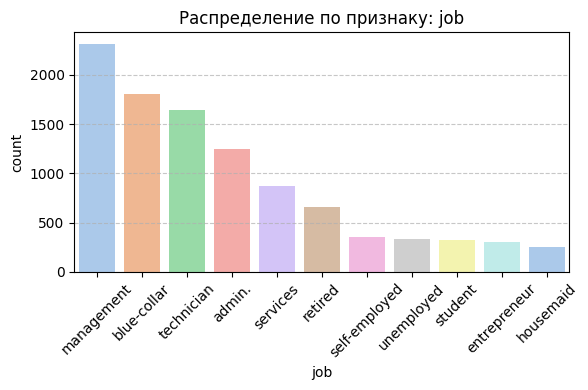

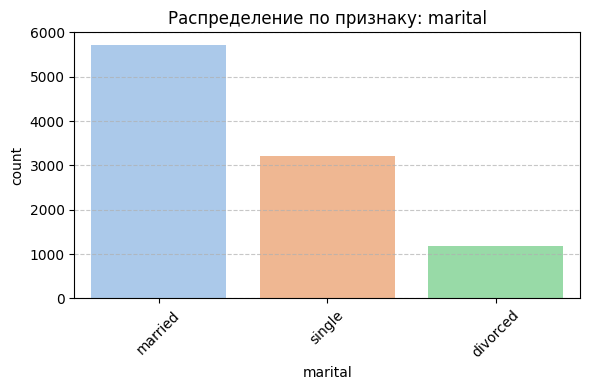

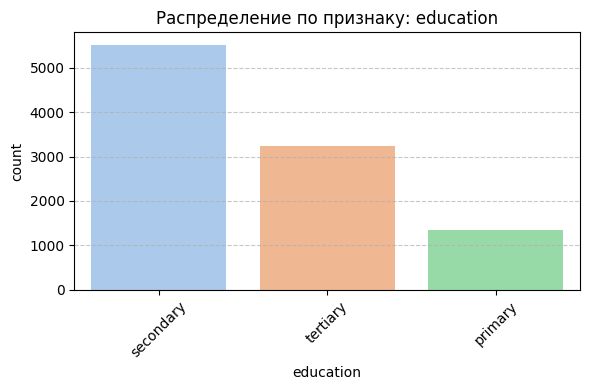

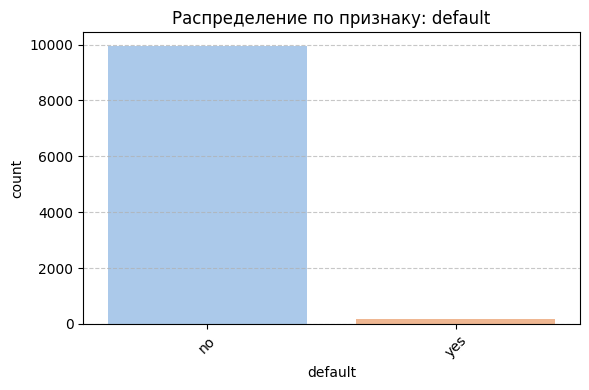

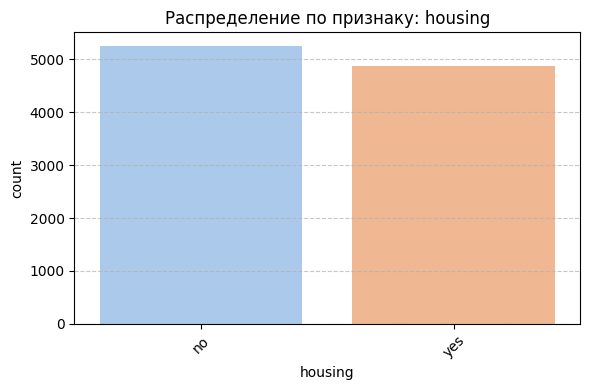

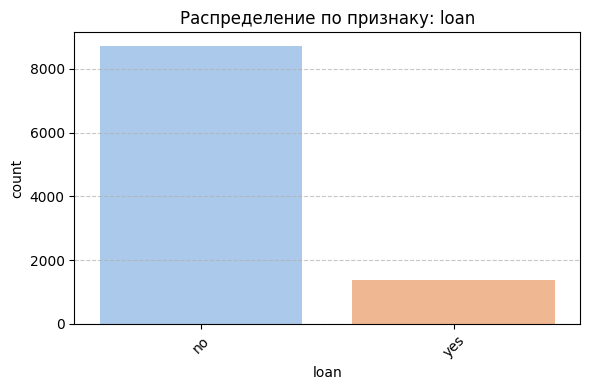

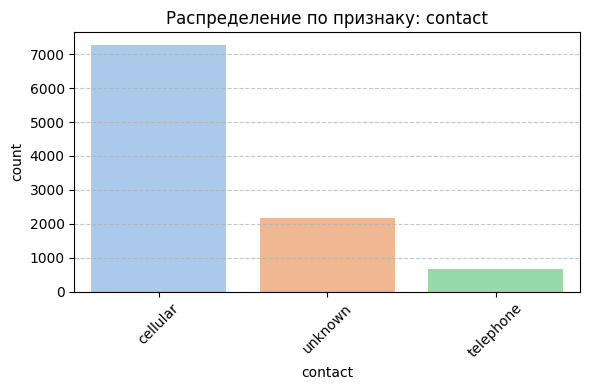

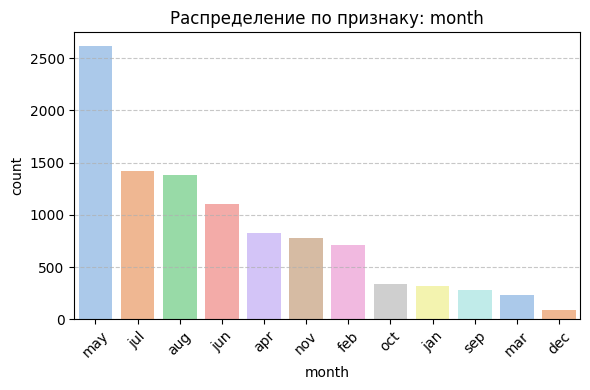

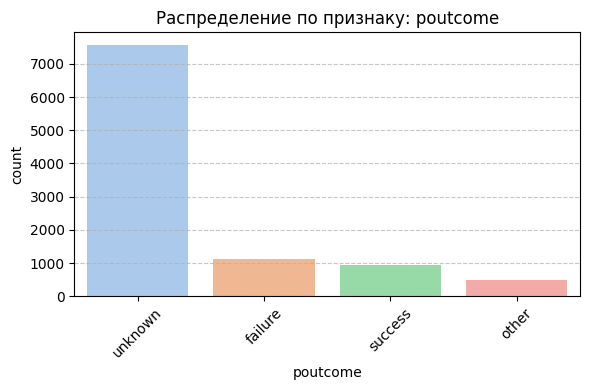

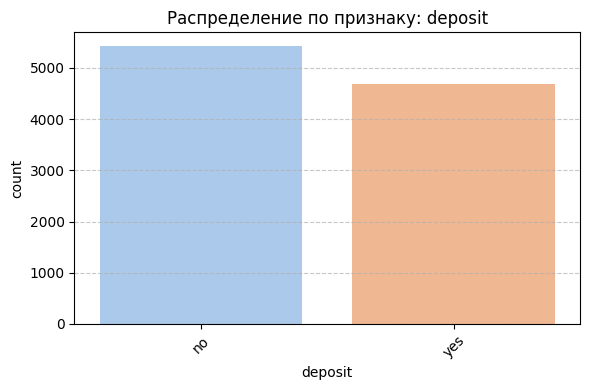

In [ ]:
# –ê–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏ —Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫–∏
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel')
    plt.title(f'–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –ø—Ä–∏–∑–Ω–∞–∫—É: {col}')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

üìä –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è –≥—Ä–∞—Ñ–∏–∫–∞ contact

–ù–∞ –¥–∏–∞–≥—Ä–∞–º–º–µ –ø–æ–∫–∞–∑–∞–Ω–æ, –∫–∞–∫ —á–∞—Å—Ç–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª–∏—Å—å —Ä–∞–∑–Ω—ã–µ –∫–∞–Ω–∞–ª—ã —Å–≤—è–∑–∏ –ø—Ä–∏ –æ–±—Ä–∞—â–µ–Ω–∏–∏ –∫ –∫–ª–∏–µ–Ω—Ç–∞–º –≤ –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤–æ–π –∫–∞–º–ø–∞–Ω–∏–∏:
üîπ cellular (–º–æ–±–∏–ª—å–Ω—ã–π —Ç–µ–ª–µ—Ñ–æ–Ω) ‚Äî —Å–∞–º—ã–π –ø–æ–ø—É–ª—è—Ä–Ω—ã–π –∫–∞–Ω–∞–ª

    –ò–º –ø–æ–ª—å–∑–æ–≤–∞–ª–∏—Å—å –≤ –ø–æ–¥–∞–≤–ª—è—é—â–µ–º –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–µ —Å–ª—É—á–∞–µ–≤ (~72% –∫–ª–∏–µ–Ω—Ç–æ–≤).

    –≠—Ç–æ –ª–æ–≥–∏—á–Ω–æ: –º–æ–±–∏–ª—å–Ω—ã–µ —Ç–µ–ª–µ—Ñ–æ–Ω—ã –≤—Å–µ–≥–¥–∞ –ø–æ–¥ —Ä—É–∫–æ–π, –∫–ª–∏–µ–Ω—Ç —á–∞—â–µ –æ—Ç–≤–µ—Ç–∏—Ç –∏ –¥–æ—Å–ª—É—à–∞–µ—Ç –∑–≤–æ–Ω–æ–∫.

    –í–µ—Ä–æ—è—Ç–Ω–æ, –∏–º–µ–Ω–Ω–æ —á–µ—Ä–µ–∑ –º–æ–±–∏–ª—å–Ω—É—é —Å–≤—è–∑—å –±–∞–Ω–∫ –¥–æ–±–∏–≤–∞–ª—Å—è –Ω–∞–∏–ª—É—á—à–∏—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤.

üî∏ unknown (–Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã–π —Ç–∏–ø –∫–æ–Ω—Ç–∞–∫—Ç–∞) ‚Äî –≤—Ç–æ—Ä–∞—è –ø–æ —á–∞—Å—Ç–æ—Ç–µ –∫–∞—Ç–µ–≥–æ—Ä–∏—è

    –ü—Ä–∏–º–µ—Ä–Ω–æ —É 21% –∫–ª–∏–µ–Ω—Ç–æ–≤ –∫–∞–Ω–∞–ª —Å–≤—è–∑–∏ –Ω–µ —É–∫–∞–∑–∞–Ω.

    –≠—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏–π –∑–≤–æ–Ω–æ–∫, SMS, –Ω–µ –∑–∞—Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –∫–æ–Ω—Ç–∞–∫—Ç –∏–ª–∏ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –¥–∞–Ω–Ω—ã—Ö.

    –¢–∞–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è —Å—Ç–æ–∏—Ç –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞—Ç—å –∫–∞–∫ –æ—Ç–¥–µ–ª—å–Ω—É—é –∫–∞—Ç–µ–≥–æ—Ä–∏—é –∏–ª–∏, –ø—Ä–∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏, –∏—Å–∫–ª—é—á–∏—Ç—å.

üü¢ telephone (—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã–π —Ç–µ–ª–µ—Ñ–æ–Ω) ‚Äî –Ω–∞–∏–º–µ–Ω–µ–µ –∏—Å–ø–æ–ª—å–∑—É–µ–º—ã–π –∫–∞–Ω–∞–ª

    –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–ª—Å—è —Ç–æ–ª—å–∫–æ —É 6.5% –∫–ª–∏–µ–Ω—Ç–æ–≤.

    –≠—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–≤—è–∑–∞–Ω–æ —Å —É—Å—Ç–∞—Ä–µ–≤–∞–Ω–∏–µ–º —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ–π —Å–≤—è–∑–∏ –∏ –Ω–∏–∑–∫–æ–π —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å—é —Ç–∞–∫–æ–≥–æ —Å–ø–æ—Å–æ–±–∞ –∫–æ–º–º—É–Ω–∏–∫–∞—Ü–∏–∏.

  üìå –í—ã–≤–æ–¥:

    üì± –ë–∞–Ω–∫ –¥–µ–ª–∞–µ—Ç —Å—Ç–∞–≤–∫—É –Ω–∞ –º–æ–±–∏–ª—å–Ω—É—é —Å–≤—è–∑—å ‚Äî —ç—Ç–æ –ø—Ä–∞–≤–∏–ª—å–Ω–æ –∏ –æ—Ç—Ä–∞–∂–∞–µ—Ç —Ä–µ–∞–ª—å–Ω—É—é –∫–æ–º–º—É–Ω–∏–∫–∞—Ü–∏–æ–Ω–Ω—É—é —Å—Ä–µ–¥—É.

    ‚ö†Ô∏è –ó–Ω–∞—á–µ–Ω–∏—è unknown —Ç—Ä–µ–±—É—é—Ç –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–æ–≥–æ –ø–æ–¥—Ö–æ–¥–∞: –ª–∏–±–æ —Å–æ—Ö—Ä–∞–Ω–∏—Ç—å –∫–∞–∫ –∫–∞—Ç–µ–≥–æ—Ä–∏—é, –ª–∏–±–æ –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç—å –ø–æ–≤–µ–¥–µ–Ω–∏–µ —Ç–∞–∫–∏—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤ –æ—Ç–¥–µ–ª—å–Ω–æ.

    ‚òéÔ∏è –ö–æ–Ω—Ç–∞–∫—Ç—ã –ø–æ —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ–º—É —Ç–µ–ª–µ—Ñ–æ–Ω—É –∏—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è —Ä–µ–¥–∫–æ –∏ –º–æ–≥—É—Ç –±—ã—Ç—å –º–∞–ª–æ–∑–Ω–∞—á–∏–º—ã–º–∏ –≤ –º–æ–¥–µ–ª–∏.

### –ó–∞–¥–∞–Ω–∏–µ 6

In [ ]:
# –ö—Ä–æ—Å—Å-—Ç–∞–±–ª–∏—Ü–∞ –ø–æ poutcome –∏ —Ü–µ–ª–µ–≤–æ–º—É –ø—Ä–∏–∑–Ω–∞–∫—É deposit
poutcome_table = pd.crosstab(df['poutcome'], df['deposit'])
print(poutcome_table)

deposit     no   yes
poutcome            
failure    562   547
other      216   265
success     84   861
unknown   4562  3008


In [ ]:
# –í—ã–¥–µ–ª–∏–º —Å—Ç—Ä–æ–∫–∏, –≥–¥–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ 'yes' –±–æ–ª—å—à–µ 'no'
more_success = poutcome_table[poutcome_table['yes'] > poutcome_table['no']]
more_success

deposit    no  yes
poutcome          
other     216  265
success    84  861

–£—Å–ø–µ—Ö–∏ (deposit = yes) –ø—Ä–µ–≤–∞–ª–∏—Ä—É—é—Ç –Ω–∞–¥ –æ—Ç–∫–∞–∑–∞–º–∏ (no) –≤ —Å–ª–µ–¥—É—é—â–∏—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏—è—Ö poutcome:

    success ‚Äî –æ—Å–æ–±–µ–Ω–Ω–æ —Å–∏–ª—å–Ω–æ: 861 –ø—Ä–æ—Ç–∏–≤ 84

    other ‚Äî —É–º–µ—Ä–µ–Ω–Ω–æ: 265 –ø—Ä–æ—Ç–∏–≤ 216

### –ó–∞–¥–∞–Ω–∏–µ 6. –†–µ–∑—É–ª—å—Ç–∞—Ç –ø—Ä–µ–¥—ã–¥—É—â–µ–π –∫–∞–º–ø–∞–Ω–∏–∏ (`poutcome`) –∏ –æ—Ç–∫–ª–∏–∫ –≤ —Ç–µ–∫—É—â–µ–π

–ü—Ä–æ–≤–µ–¥—ë–Ω –∞–Ω–∞–ª–∏–∑ —Å–≤—è–∑–∏ –º–µ–∂–¥—É —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–º –ø—Ä–µ–¥—ã–¥—É—â–µ–π –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤–æ–π –∫–∞–º–ø–∞–Ω–∏–∏ (`poutcome`)  
–∏ –æ—Ç–∫–ª–∏–∫–æ–º –∫–ª–∏–µ–Ω—Ç–∞ –Ω–∞ —Ç–µ–∫—É—â–µ–µ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ (`deposit`).

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã:

- `success`: 861 –æ—Ç–∫–ª–∏–∫ –ø—Ä–æ—Ç–∏–≤ 84 –æ—Ç–∫–∞–∑–æ–≤ ‚Äî **—è—Ä–∫–æ –≤—ã—Ä–∞–∂–µ–Ω–Ω–∞—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è —Å–≤—è–∑—å**
- `other`: 265 –æ—Ç–∫–ª–∏–∫–æ–≤ –ø—Ä–æ—Ç–∏–≤ 216 –æ—Ç–∫–∞–∑–æ–≤ ‚Äî **—É–º–µ—Ä–µ–Ω–Ω–æ–µ –ø—Ä–µ–æ–±–ª–∞–¥–∞–Ω–∏–µ —É—Å–ø–µ—Ö–∞**

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –µ—Å–ª–∏ –∫–ª–∏–µ–Ω—Ç —É—á–∞—Å—Ç–≤–æ–≤–∞–ª –≤ –ø—Ä–æ—à–ª–æ–π –∫–∞–º–ø–∞–Ω–∏–∏ —Å –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–º (`success`),  
–æ–Ω **—Å –≤—ã—Å–æ–∫–æ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é** –æ—Ç–∫–ª–∏–∫–Ω–µ—Ç—Å—è –∏ –≤ —ç—Ç–æ—Ç —Ä–∞–∑. –≠—Ç–æ —Ü–µ–Ω–Ω—ã–π —Å–∏–≥–Ω–∞–ª –¥–ª—è —Ç–∞—Ä–≥–µ—Ç–∏–Ω–≥–∞.

–ö–∞—Ç–µ–≥–æ—Ä–∏—è `unknown` (–Ω–µ —É—á–∞—Å—Ç–≤–æ–≤–∞–ª —Ä–∞–Ω–µ–µ) ‚Äî —Å–∞–º–∞—è –º–∞—Å—Å–æ–≤–∞—è, –Ω–æ —É –Ω–µ—ë –ø—Ä–µ–æ–±–ª–∞–¥–∞—é—Ç –æ—Ç–∫–∞–∑—ã.

### –ó–∞–¥–∞–Ω–∏–µ 7

In [ ]:
# –ö—Ä–æ—Å—Å-—Ç–∞–±–ª–∏—Ü–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –æ—Ç–∫–ª–∏–∫–æ–≤ –ø–æ –º–µ—Å—è—Ü–∞–º
month_table = pd.crosstab(df['month'], df['deposit'])
print(month_table)

deposit    no  yes
month             
apr       317  513
aug       775  610
dec         9   84
feb       323  386
jan       194  125
jul       836  582
jun       606  498
mar        24  213
may      1776  841
nov       456  324
oct        62  273
sep        46  232


In [ ]:
# –ú–µ—Å—è—Ü —Å –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –æ—Ç–∫–∞–∑–æ–≤ (no)
month_with_most_nos = month_table['no'].idxmax()
num_nos = month_table['no'].max()

print(f"üîé –ë–æ–ª—å—à–µ –≤—Å–µ–≥–æ –æ—Ç–∫–∞–∑–æ–≤ –±—ã–ª–æ –≤ –º–µ—Å—è—Ü–µ: {month_with_most_nos} ({num_nos} –æ—Ç–∫–∞–∑–æ–≤)")

üîé –ë–æ–ª—å—à–µ –≤—Å–µ–≥–æ –æ—Ç–∫–∞–∑–æ–≤ –±—ã–ª–æ –≤ –º–µ—Å—è—Ü–µ: may (1776 –æ—Ç–∫–∞–∑–æ–≤)


üìå –û—Ç–≤–µ—Ç –Ω–∞ –∑–∞–¥–∞–Ω–∏–µ 7:

    üî¥ –ú–µ—Å—è—Ü —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º —á–∏—Å–ª–æ–º –æ—Ç–∫–∞–∑–æ–≤: may

    üìä –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∫–∞–∑–æ–≤: 1776

    –ü—Ä–∏ —ç—Ç–æ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–æ–≥–ª–∞—Å–∏–π –≤ –º–∞–µ ‚Äî 841 (–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –º–µ–Ω—å—à–µ –æ—Ç–∫–∞–∑–æ–≤)

### –ó–∞–¥–∞–Ω–∏–µ 8

In [ ]:
# –°–æ–∑–¥–∞—ë–º –≤–æ–∑—Ä–∞—Å—Ç–Ω—ã–µ –≥—Ä—É–ø–ø—ã
bins = [18, 30, 40, 50, 60, 100]
labels = ['18‚Äì30', '31‚Äì40', '41‚Äì50', '51‚Äì60', '61+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

# –ü—Ä–æ–≤–µ—Ä–∫–∞
df[['age', 'age_group']].head()

age age_group
0   59     51‚Äì60
1   56     51‚Äì60
2   41     41‚Äì50
3   55     51‚Äì60
4   54     51‚Äì60

In [ ]:
# –ö—Ä–æ—Å—Å-—Ç–∞–±–ª–∏—Ü–∞: –≤–æ–∑—Ä–∞—Å—Ç–Ω—ã–µ –≥—Ä—É–ø–ø—ã –∏ –æ—Ç–∫–ª–∏–∫
age_deposit = pd.crosstab(df['age_group'], df['deposit'])
print(age_deposit)

deposit      no   yes
age_group            
18‚Äì30       818  1044
31‚Äì40      2215  1627
41‚Äì50      1360   895
51‚Äì60       933   692
61+          97   416


In [ ]:
# –ì—Ä—É–ø–ø—ã, –≥–¥–µ –æ—Ç–∫–ª–∏–∫–æ–≤ –±–æ–ª—å—à–µ, —á–µ–º –æ—Ç–∫–∞–∑–æ–≤
more_yes_groups = age_deposit[age_deposit['yes'] > age_deposit['no']]
print("–ì—Ä—É–ø–ø—ã, –±–æ–ª–µ–µ —Å–∫–ª–æ–Ω–Ω—ã–µ –æ—Ç–∫—Ä—ã–≤–∞—Ç—å –¥–µ–ø–æ–∑–∏—Ç:")
print(more_yes_groups)

–ì—Ä—É–ø–ø—ã, –±–æ–ª–µ–µ —Å–∫–ª–æ–Ω–Ω—ã–µ –æ—Ç–∫—Ä—ã–≤–∞—Ç—å –¥–µ–ø–æ–∑–∏—Ç:
deposit     no   yes
age_group           
18‚Äì30      818  1044
61+         97   416


### –ó–∞–¥–∞–Ω–∏–µ 8. –í–æ–∑—Ä–∞—Å—Ç–Ω—ã–µ –≥—Ä—É–ø–ø—ã –∏ —Å–∫–ª–æ–Ω–Ω–æ—Å—Ç—å –∫ –æ—Ç–∫—Ä—ã—Ç–∏—é –¥–µ–ø–æ–∑–∏—Ç–∞

–ö–ª–∏–µ–Ω—Ç—ã –±—ã–ª–∏ —Ä–∞–∑–±–∏—Ç—ã –Ω–∞ 5 –≤–æ–∑—Ä–∞—Å—Ç–Ω—ã—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–π:
- `18‚Äì30`
- `31‚Äì40`
- `41‚Äì50`
- `51‚Äì60`
- `61+`

–ê–Ω–∞–ª–∏–∑ –ø–æ–∫–∞–∑–∞–ª, —á—Ç–æ **–≤ –¥–≤—É—Ö –≥—Ä—É–ø–ø–∞—Ö**:
- `18‚Äì30`
- `61+`

–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∫–ª–∏–∫–æ–≤ **`yes` –ø—Ä–µ–≤—ã—à–∞–µ—Ç `no`**, —Ç–æ –µ—Å—Ç—å —ç—Ç–∏ –∫–ª–∏–µ–Ω—Ç—ã **–±–æ–ª–µ–µ —Å–∫–ª–æ–Ω–Ω—ã –æ—Ç–∫—Ä—ã–≤–∞—Ç—å –¥–µ–ø–æ–∑–∏—Ç**.

–≠—Ç–æ —Ü–µ–Ω–Ω—ã–π –∏–Ω—Å–∞–π—Ç:
- –ú–æ–ª–æ–¥—ã–µ –∫–ª–∏–µ–Ω—Ç—ã (18‚Äì30) –±–æ–ª–µ–µ –æ—Ç–∫—Ä—ã—Ç—ã –∫ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è–º
- –ü–æ–∂–∏–ª—ã–µ –∫–ª–∏–µ–Ω—Ç—ã (61+) —á–∞—â–µ –∑–∞–∏–Ω—Ç–µ—Ä–µ—Å–æ–≤–∞–Ω—ã –≤ —Å–±–µ—Ä–µ–∂–µ–Ω–∏—è—Ö

üìå –¢–∞–∫–∏–µ –≥—Ä—É–ø–ø—ã –º–æ–∂–Ω–æ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—Ç—å –∫–∞–∫ **—Ü–µ–ª–µ–≤—É—é –∞—É–¥–∏—Ç–æ—Ä–∏—é** –ø—Ä–∏ –ø–ª–∞–Ω–∏—Ä–æ–≤–∞–Ω–∏–∏ –±—É–¥—É—â–∏—Ö –∫–∞–º–ø–∞–Ω–∏–π.

### –ó–∞–¥–∞–Ω–∏—è 9 –∏ 10

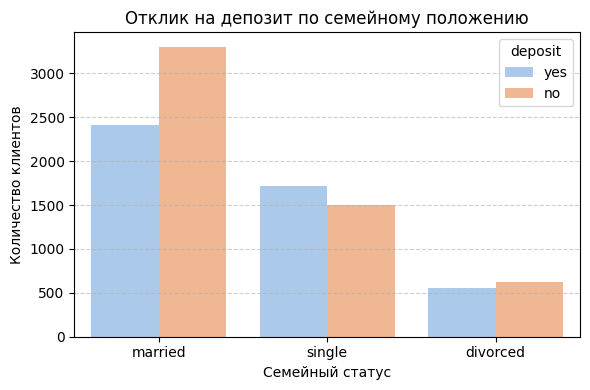

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='marital', hue='deposit', palette='pastel')
plt.title('–û—Ç–∫–ª–∏–∫ –Ω–∞ –¥–µ–ø–æ–∑–∏—Ç –ø–æ —Å–µ–º–µ–π–Ω–æ–º—É –ø–æ–ª–æ–∂–µ–Ω–∏—é')
plt.xlabel('–°–µ–º–µ–π–Ω—ã–π —Å—Ç–∞—Ç—É—Å')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

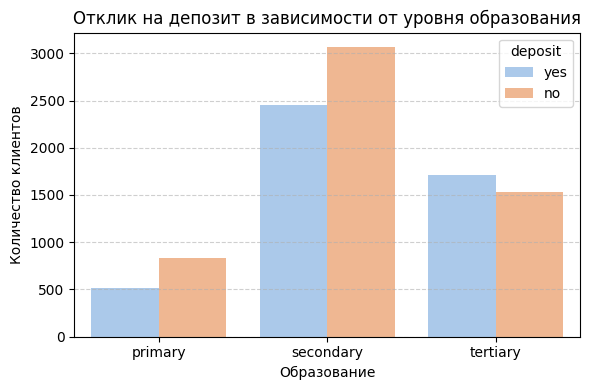

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='education', hue='deposit', palette='pastel', order=['primary', 'secondary', 'tertiary'])
plt.title('–û—Ç–∫–ª–∏–∫ –Ω–∞ –¥–µ–ø–æ–∑–∏—Ç –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —É—Ä–æ–≤–Ω—è –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è')
plt.xlabel('–û–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

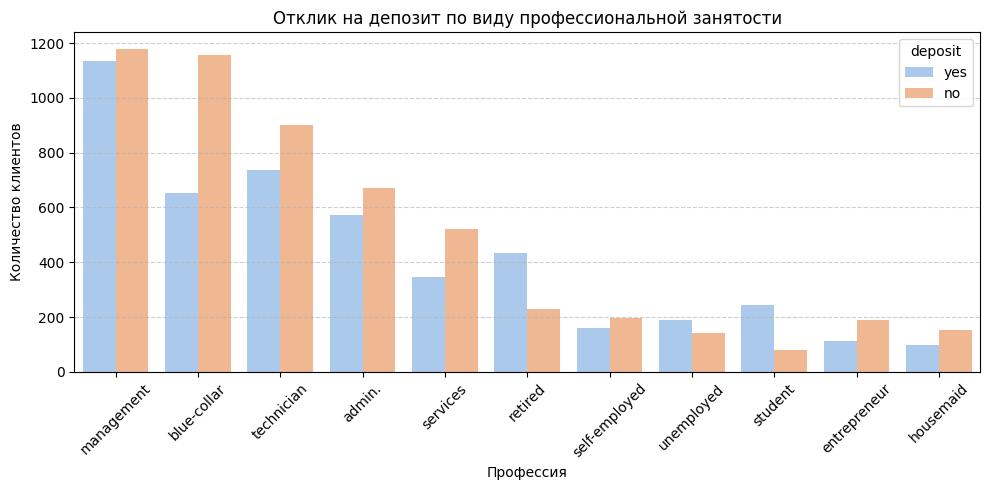

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='job', hue='deposit', palette='pastel', order=df['job'].value_counts().index)
plt.title('–û—Ç–∫–ª–∏–∫ –Ω–∞ –¥–µ–ø–æ–∑–∏—Ç –ø–æ –≤–∏–¥—É –ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª—å–Ω–æ–π –∑–∞–Ω—è—Ç–æ—Å—Ç–∏')
plt.xlabel('–ü—Ä–æ—Ñ–µ—Å—Å–∏—è')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### –ó–∞–¥–∞–Ω–∏–µ 11

In [ ]:
# –û—Ç–±–∏—Ä–∞–µ–º —Ç–æ–ª—å–∫–æ –∫–ª–∏–µ–Ω—Ç–æ–≤, –æ—Ç–∫—Ä—ã–≤—à–∏—Ö –¥–µ–ø–æ–∑–∏—Ç
df_yes = df[df['deposit'] == 'yes']

In [ ]:
# –°–≤–æ–¥–Ω–∞—è —Ç–∞–±–ª–∏—Ü–∞ –ø–æ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—é –∏ —Å–µ–º–µ–π–Ω–æ–º—É –ø–æ–ª–æ–∂–µ–Ω–∏—é
pivot_table = pd.pivot_table(
    df_yes,
    index='education',
    columns='marital',
    values='deposit',
    aggfunc='count',
    fill_value=0
)

print(pivot_table)

marital    divorced  married  single
education                           
primary          96      339      82
secondary       283     1289     879
tertiary        174      784     755


In [ ]:
# –ù–∞–π–¥—ë–º –∫–æ–º–±–∏–Ω–∞—Ü–∏—é —Å –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–º —á–∏—Å–ª–æ–º –æ—Ç–∫–ª–∏–∫–æ–≤
max_value = pivot_table.values.max()
max_group = pivot_table.stack().idxmax()

print(f"üîé –ù–∞–∏–±–æ–ª–µ–µ –º–Ω–æ–≥–æ—á–∏—Å–ª–µ–Ω–Ω–∞—è –≥—Ä—É–ø–ø–∞ —Å—Ä–µ–¥–∏ –æ—Ç–∫–ª–∏–∫–Ω—É–≤—à–∏—Ö—Å—è:")
print(f"–û–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ: {max_group[0]}, –°–µ–º–µ–π–Ω—ã–π —Å—Ç–∞—Ç—É—Å: {max_group[1]} ({max_value} —á–µ–ª–æ–≤–µ–∫)")

üîé –ù–∞–∏–±–æ–ª–µ–µ –º–Ω–æ–≥–æ—á–∏—Å–ª–µ–Ω–Ω–∞—è –≥—Ä—É–ø–ø–∞ —Å—Ä–µ–¥–∏ –æ—Ç–∫–ª–∏–∫–Ω—É–≤—à–∏—Ö—Å—è:
–û–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ: secondary, –°–µ–º–µ–π–Ω—ã–π —Å—Ç–∞—Ç—É—Å: married (1289 —á–µ–ª–æ–≤–µ–∫)


### –ó–∞–¥–∞–Ω–∏–µ 11. –ù–∞–∏–±–æ–ª–µ–µ –º–Ω–æ–≥–æ—á–∏—Å–ª–µ–Ω–Ω–∞—è –≥—Ä—É–ø–ø–∞ –æ—Ç–∫–ª–∏–∫–Ω—É–≤—à–∏—Ö—Å—è –ø–æ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—é –∏ —Å–µ–º–µ–π–Ω–æ–º—É –ø–æ–ª–æ–∂–µ–Ω–∏—é

–ù–∞ –æ—Å–Ω–æ–≤–µ —Å–≤–æ–¥–Ω–æ–π —Ç–∞–±–ª–∏—Ü—ã, –ø–æ—Å—Ç—Ä–æ–µ–Ω–Ω–æ–π –ø–æ –ø—Ä–∏–∑–Ω–∞–∫–∞–º `education` –∏ `marital`,  
–æ–ø—Ä–µ–¥–µ–ª–µ–Ω–æ, –∫–∞–∫–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç–æ –æ—Ç–∫—Ä—ã–≤–∞–ª–∏ –¥–µ–ø–æ–∑–∏—Ç (`deposit = yes`).

üîç **–ù–∞–∏–±–æ–ª–µ–µ –º–Ω–æ–≥–æ—á–∏—Å–ª–µ–Ω–Ω–∞—è –≥—Ä—É–ø–ø–∞:**
- **–û–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ:** `secondary`
- **–°–µ–º–µ–π–Ω—ã–π —Å—Ç–∞—Ç—É—Å:** `married`
- **–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤:** 1289

üìå –≠—Ç–æ —Å–∞–º–∞—è –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç–µ–ª—å–Ω–∞—è –ø–æ–¥–≥—Ä—É–ø–ø–∞ —Å—Ä–µ–¥–∏ —Ç–µ—Ö, –∫—Ç–æ –æ—Ç–∫–ª–∏–∫–Ω—É–ª—Å—è.  
–†–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç—Å—è —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—Ç—å –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å —Ç–∞–∫–∏–º –ø—Ä–æ—Ñ–∏–ª–µ–º –∫–∞–∫ –∫–ª—é—á–µ–≤—É—é —á–∞—Å—Ç—å —Ü–µ–ª–µ–≤–æ–π –∞—É–¥–∏—Ç–æ—Ä–∏–∏ –ø—Ä–∏ –±—É–¥—É—â–∏—Ö –∫–∞–º–ø–∞–Ω–∏—è—Ö.

## –ß–∞—Å—Ç—å 3: –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö

### –ó–∞–¥–∞–Ω–∏–µ 1

In [ ]:
# –°–ª–æ–≤–∞—Ä—å –¥–ª—è –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è
edu_map = {
    'primary': 0,
    'secondary': 1,
    'tertiary': 2
}

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º
df['education_level'] = df['education'].map(edu_map)

# –ü—Ä–æ–≤–µ—Ä–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
df[['education', 'education_level']].drop_duplicates()

education  education_level
0   secondary                1
4    tertiary                2
16    primary                0

### –ß–∞—Å—Ç—å 3 ‚Äî –ó–∞–¥–∞–Ω–∏–µ 1: –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ —É—Ä–æ–≤–Ω–µ–π –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è

–ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ `education` –±—ã–ª –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω –≤ —á–∏—Å–ª–æ–≤–æ–π –≤–∏–¥:

- `primary` ‚Üí 0  
- `secondary` ‚Üí 1  
- `tertiary` ‚Üí 2

–°–æ–∑–¥–∞–Ω –Ω–æ–≤—ã–π —Å—Ç–æ–ª–±–µ—Ü `education_level`, –∫–æ—Ç–æ—Ä—ã–π –±—É–¥–µ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏ –º–æ–¥–µ–ª–∏.  
–≠—Ç–æ —É–ø—Ä–æ—â–∞–µ—Ç —Ä–∞–±–æ—Ç—É –∞–ª–≥–æ—Ä–∏—Ç–º–æ–≤ –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è, –æ—Å–æ–±–µ–Ω–Ω–æ –µ—Å–ª–∏ –º–æ–¥–µ–ª—å –Ω–µ –ø–æ–¥–¥–µ—Ä–∂–∏–≤–∞–µ—Ç –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –Ω–∞–ø—Ä—è–º—É—é.

### –ó–∞–¥–∞–Ω–∏—è 2 –∏ 3

In [ ]:
# –°–ø–∏—Å–æ–∫ –±–∏–Ω–∞—Ä–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
binary_cols = ['default', 'housing', 'loan', 'deposit']

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏–π
df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if x == 'yes' else 0)

# –ü—Ä–æ–≤–µ—Ä–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
df[binary_cols].head()

default  housing  loan  deposit
0        0        1     0        1
1        0        0     0        1
2        0        1     0        1
3        0        1     0        1
4        0        0     0        1

### –ó–∞–¥–∞–Ω–∏—è 2 –∏ 3. –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –±–∏–Ω–∞—Ä–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω—ã —Å–ª–µ–¥—É—é—â–∏–µ –±–∏–Ω–∞—Ä–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ:

- `default` ‚Äî –Ω–∞–ª–∏—á–∏–µ –ø—Ä–æ—Å—Ä–æ—á–µ–Ω–Ω–æ–≥–æ –∫—Ä–µ–¥–∏—Ç–∞
- `housing` ‚Äî –Ω–∞–ª–∏—á–∏–µ –∏–ø–æ—Ç–µ—á–Ω–æ–≥–æ –∫—Ä–µ–¥–∏—Ç–∞
- `loan` ‚Äî –Ω–∞–ª–∏—á–∏–µ –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–æ–≥–æ –∫—Ä–µ–¥–∏—Ç–∞
- `deposit` ‚Äî —Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è (–æ—Ç–∫—Ä—ã–ª –¥–µ–ø–æ–∑–∏—Ç –∏–ª–∏ –Ω–µ—Ç)

–ó–Ω–∞—á–µ–Ω–∏—è `yes` –±—ã–ª–∏ –∑–∞–º–µ–Ω–µ–Ω—ã –Ω–∞ `1`, –∞ `no` ‚Äî –Ω–∞ `0`.

–≠—Ç–æ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –¥–ª—è –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–π —Ä–∞–±–æ—Ç—ã –º–æ–¥–µ–ª–µ–π –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è,  
—Ç–∞–∫ –∫–∞–∫ –º–Ω–æ–≥–∏–µ –∞–ª–≥–æ—Ä–∏—Ç–º—ã —Ç—Ä–µ–±—É—é—Ç —á–∏—Å–ª–æ–≤–æ–≥–æ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.

### –ó–∞–¥–∞–Ω–∏–µ 4

In [ ]:
# –ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è one-hot encoding
cat_features = ['job', 'marital', 'contact', 'month', 'poutcome']

# –°–æ–∑–¥–∞—ë–º –¥–∞–º–º–∏-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ
df_dummies = pd.get_dummies(df, columns=cat_features, drop_first=True)

# –ü—Ä–æ–≤–µ—Ä–∏–º —Ä–∞–∑–º–µ—Ä –∏ –ø–µ—Ä–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã
print("–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞ –ø–æ—Å–ª–µ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è:", df_dummies.shape)
df_dummies.head()

–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞ –ø–æ—Å–ª–µ –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏—è: (10105, 42)


age  education  default  balance  housing  loan  day  duration  campaign  \
0   59  secondary        0   2343.0        1     0    5      1042         1   
1   56  secondary        0     45.0        0     0    5      1467         1   
2   41  secondary        0   1270.0        1     0    5      1389         1   
3   55  secondary        0   2476.0        1     0    5       579         1   
4   54   tertiary        0    184.0        0     0    5       673         2   

   pdays  ...  month_jul  month_jun month_mar  month_may  month_nov  \
0     -1  ...      False      False     False       True      False   
1     -1  ...      False      False     False       True      False   
2     -1  ...      False      False     False       True      False   
3     -1  ...      False      False     False       True      False   
4     -1  ...      False      False     False       True      False   

   month_oct  month_sep  poutcome_other  poutcome_success  poutcome_unknown  
0      False      False           False             False              True  
1      False      False           False             False              True  
2      False      False           False             False              True  
3      False      False           False             False              True  
4      False      False           False             False              True  

[5 rows x 42 columns]

In [ ]:
# –í—ã–≤–æ–¥–∏–º –Ω–æ–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã
new_columns = [col for col in df_dummies.columns if any(feat in col for feat in cat_features)]
print("–°–æ–∑–¥–∞–Ω—ã –¥–∞–º–º–∏-–ø—Ä–∏–∑–Ω–∞–∫–∏:")
print(new_columns)

–°–æ–∑–¥–∞–Ω—ã –¥–∞–º–º–∏-–ø—Ä–∏–∑–Ω–∞–∫–∏:
['job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_married', 'marital_single', 'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']


### –ó–∞–¥–∞–Ω–∏–µ 4. –°–æ–∑–¥–∞–Ω–∏–µ –¥–∞–º–º–∏-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö (one-hot encoding)

–î–ª—è —Å–ª–µ–¥—É—é—â–∏—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –±—ã–ª–∏ —Å–æ–∑–¥–∞–Ω—ã –¥–∞–º–º–∏-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ:

- `job` (10 –∫–∞—Ç–µ–≥–æ—Ä–∏–π)
- `marital` (2 –∫–∞—Ç–µ–≥–æ—Ä–∏–∏: `married`, `single`; `divorced` –æ—Ç–±—Ä–æ—à–µ–Ω –ø–æ `drop_first=True`)
- `contact`
- `month` (11 –º–µ—Å—è—Ü–µ–≤ –∏–∑ 12, –±–µ–∑ –¥—É–±–ª–∏—Ä–æ–≤–∞–Ω–∏—è)
- `poutcome`

–ò—Ç–æ–≥:
- –†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞ —É–≤–µ–ª–∏—á–∏–ª—Å—è –¥–æ **42 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤**
- –í—Å–µ –¥–∞–º–º–∏-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω—ã –≤ –≤–∏–¥–µ –±—É–ª–µ–≤—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π (`True` / `False`), –ø—Ä–∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏ –∏—Ö –º–æ–∂–Ω–æ –ø—Ä–∏–≤–µ—Å—Ç–∏ –∫ —á–∏—Å–ª–æ–≤–æ–º—É –≤–∏–¥—É
- –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω –ø–∞—Ä–∞–º–µ—Ç—Ä `drop_first=True` –¥–ª—è –ø—Ä–µ–¥–æ—Ç–≤—Ä–∞—â–µ–Ω–∏—è –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç–∏

–ü—Ä–∏–º–µ—Ä —Å–æ–∑–¥–∞–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:
- `job_blue-collar`, `job_technician`, ...
- `marital_single`, `marital_married`
- `month_may`, `month_jul`, ...
- `poutcome_success`, `poutcome_unknown`

–¢–µ–ø–µ—Ä—å –¥–∞–Ω–Ω—ã–µ –ø–æ–ª–Ω–æ—Å—Ç—å—é –≥–æ—Ç–æ–≤—ã –¥–ª—è –ø–æ–¥–∞—á–∏ –≤ –º–æ–¥–µ–ª—å –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è.

### –ó–∞–¥–∞–Ω–∏—è 5 –∏ 6

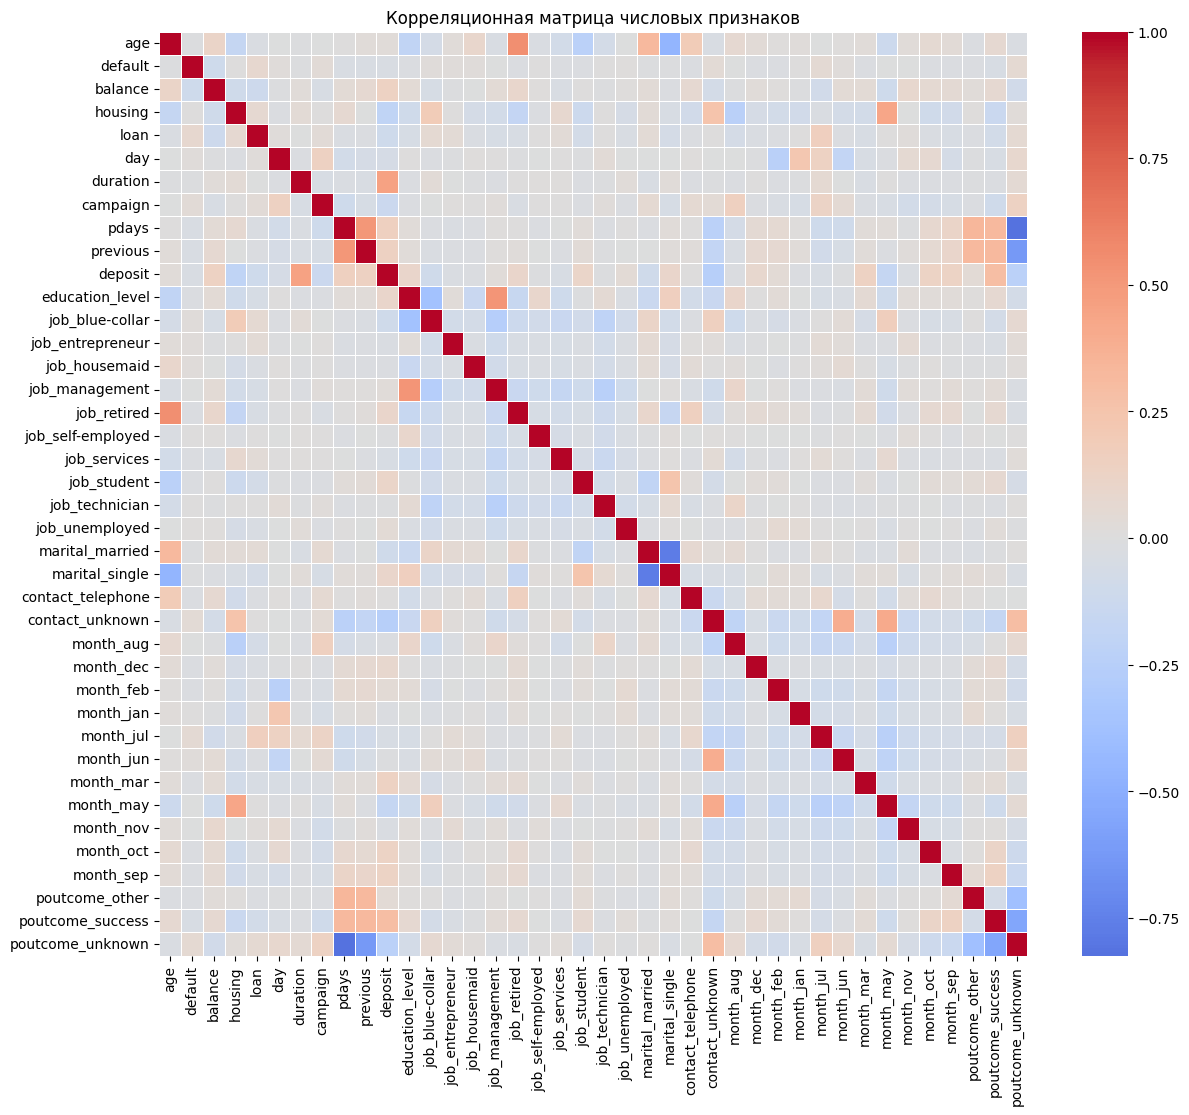

In [ ]:
# –£–¥–∞–ª–∏–º –Ω–µ—á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, –µ—Å–ª–∏ –æ—Å—Ç–∞–ª–∏—Å—å
df_numeric = df_dummies.select_dtypes(include=['int64', 'float64', 'bool'])  # bool –Ω–∞ –≤—Å—è–∫–∏–π —Å–ª—É—á–∞–π

# –°—Ç—Ä–æ–∏–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É —Ç–æ–ª—å–∫–æ –ø–æ —á–∏—Å–ª–æ–≤—ã–º –ø—Ä–∏–∑–Ω–∞–∫–∞–º
plt.figure(figsize=(14, 12))
corr_matrix = df_numeric.corr()

sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False, fmt=".2f", linewidths=0.5)
plt.title('–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞ —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤')
plt.show()

In [ ]:
# –ù–∞—Ö–æ–¥–∏–º –ø–∞—Ä—ã –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å —Å–∏–ª—å–Ω–æ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π (–±–µ–∑ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤ –∏ —Å–∞–º–æ–≥–æ —Å–µ–±—è)
def find_strong_correlations(corr_matrix, threshold=0.7):
    corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)
    strong_pairs = corr_pairs[(corr_pairs < 1) & (corr_pairs > threshold)]
    return strong_pairs

strong_corrs = find_strong_correlations(corr_matrix)
print("üîé –°–∏–ª—å–Ω–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—â–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ (|corr| > 0.7):")
print(strong_corrs)

üîé –°–∏–ª—å–Ω–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—â–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ (|corr| > 0.7):
poutcome_unknown  pdays               0.824031
pdays             poutcome_unknown    0.824031
marital_married   marital_single      0.779038
marital_single    marital_married     0.779038
dtype: float64


### –ó–∞–¥–∞–Ω–∏—è 5 –∏ 6. –ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞ –∏ –æ—Ü–µ–Ω–∫–∞ –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç–∏

–ë—ã–ª–∞ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞ –≤—Å–µ—Ö —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.

#### üîç –ù–∞–∏–±–æ–ª–µ–µ —Å–∏–ª—å–Ω—ã–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏:

- `poutcome_unknown` ‚Üî `pdays`: **0.82**
- `marital_married` ‚Üî `marital_single`: **0.78**

–¢–∞–∫–∏–µ –≤—ã—Å–æ–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –º–æ–≥—É—Ç –ø—Ä–∏–≤–µ—Å—Ç–∏ –∫ –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç–∏, –æ—Å–æ–±–µ–Ω–Ω–æ –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ –ª–∏–Ω–µ–π–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π  
(–Ω–∞–ø—Ä–∏–º–µ—Ä, –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏). –≠—Ç–æ –º–æ–∂–Ω–æ —Ä–µ—à–∏—Ç—å —Å–ª–µ–¥—É—é—â–∏–º–∏ —Å–ø–æ—Å–æ–±–∞–º–∏:
- –£–¥–∞–ª–∏—Ç—å –æ–¥–∏–Ω –∏–∑ —Å–∏–ª—å–Ω–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—â–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
- –ò—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—é (–Ω–∞–ø—Ä–∏–º–µ—Ä, L2 ‚Äî Ridge)
- –ü—Ä–∏–º–µ–Ω—è—Ç—å –º–æ–¥–µ–ª–∏, —É—Å—Ç–æ–π—á–∏–≤—ã–µ –∫ –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –¥–µ—Ä–µ–≤—å—è —Ä–µ—à–µ–Ω–∏–π, –∞–Ω—Å–∞–º–±–ª–∏)

–í –æ—Å—Ç–∞–ª—å–Ω–æ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—Ç —Å–ª–∞–±–æ –∏ –Ω–µ –≤—ã–∑—ã–≤–∞—é—Ç –æ–ø–∞—Å–µ–Ω–∏–π.

### –ó–∞–¥–∞–Ω–∏—è 7 –∏ 8

In [ ]:
X = df.drop(['deposit'], axis=1)
y = df['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [ ]:
# –ü–µ—Ä–µ—Å–æ–∑–¥–∞—ë–º –¥–∞–º–º–∏-–ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ —Å –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ–º education
cat_features = ['job', 'marital', 'contact', 'month', 'poutcome', 'education']

df_dummies = pd.get_dummies(df, columns=cat_features, drop_first=True)

# –¢–µ–ø–µ—Ä—å –≤—Å—ë –≥–æ—Ç–æ–≤–æ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è
X = df_dummies.drop(['deposit'], axis=1)
y = df_dummies['deposit']

# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42, test_size=0.33
)

In [ ]:
# –£–¥–∞–ª—è–µ–º –∫–æ–ª–æ–Ω–∫—É age_group, –µ—Å–ª–∏ –æ–Ω–∞ –µ—Å—Ç—å
if 'age_group' in df_dummies.columns:
    df_dummies = df_dummies.drop(['age_group'], axis=1)

# –û–±–Ω–æ–≤–ª—è–µ–º X –∏ y
X = df_dummies.drop(['deposit'], axis=1)
y = df_dummies['deposit']

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42, test_size=0.33
)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

üìä –ú–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏:
Accuracy: 0.818
Precision: 0.817
Recall: 0.782
F1 Score: 0.799
ROC AUC Score: 0.898


<Figure size 500x400 with 0 Axes>

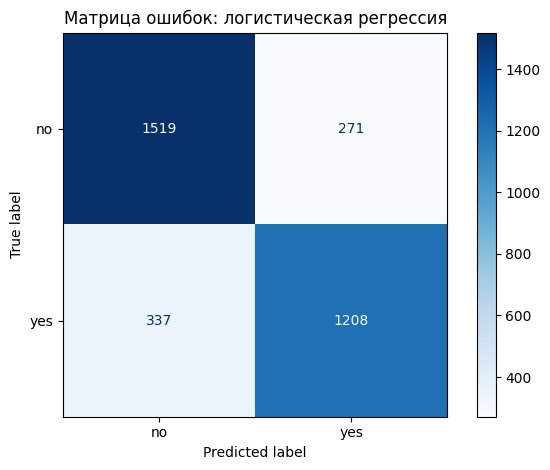

In [ ]:
# üìä –†–∞—Å—á—ë—Ç –º–µ—Ç—Ä–∏–∫
print("üìä –ú–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏:")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("Precision:", round(precision_score(y_test, y_pred), 3))
print("Recall:", round(recall_score(y_test, y_pred), 3))
print("F1 Score:", round(f1_score(y_test, y_pred), 3))
print("ROC AUC Score:", round(roc_auc_score(y_test, y_proba), 3))

# üî≤ –ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['no', 'yes'])

plt.figure(figsize=(5, 4))
disp.plot(cmap='Blues', values_format='d')
plt.title("–ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫: –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è")
plt.grid(False)
plt.tight_layout()
plt.show()

### –ß–∞—Å—Ç—å 4 ‚Äî –ó–∞–¥–∞–Ω–∏—è 7 –∏ 8: –õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è –∏ –æ—Ü–µ–Ω–∫–∞ –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏

–û–±—É—á–µ–Ω–∞ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è –Ω–∞ –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö, –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–Ω—ã—Ö –≤ —á–∏—Å–ª–æ–≤–æ–π –≤–∏–¥.

#### üìä –ú–µ—Ç—Ä–∏–∫–∏ –º–æ–¥–µ–ª–∏:
- **Accuracy**: 81.8%
- **Precision**: 81.7%
- **Recall**: 78.2%
- **F1-score**: 79.9%
- **ROC AUC**: 89.8%

–ú–æ–¥–µ–ª—å –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Ö–æ—Ä–æ—à—É—é —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ—Å—Ç—å –º–µ–∂–¥—É —Ç–æ—á–Ω–æ—Å—Ç—å—é –∏ –ø–æ–ª–Ω–æ—Ç–æ–π.  
–í—ã—Å–æ–∫–∏–π ROC AUC (–ø–æ—á—Ç–∏ 90%) —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤—É–µ—Ç –æ —Ö–æ—Ä–æ—à–µ–º —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–∏ –∫–ª–∞—Å—Å–æ–≤.

#### üî≤ –ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫:
- 1519 –∫–ª–∏–µ–Ω—Ç–æ–≤ –ø—Ä–∞–≤–∏–ª—å–Ω–æ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –∫–∞–∫ –Ω–µ –∑–∞–∏–Ω—Ç–µ—Ä–µ—Å–æ–≤–∞–Ω–Ω—ã–µ
- 1208 –∫–ª–∏–µ–Ω—Ç–æ–≤ ‚Äî –ø—Ä–∞–≤–∏–ª—å–Ω–æ –∫–∞–∫ –æ—Ç–∫–ª–∏–∫–Ω—É–≤—à–∏–µ—Å—è
- 271 ‚Äî –ª–æ–∂–Ω–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω—ã –∫–∞–∫ "–¥–∞", —Ö–æ—Ç—è –æ–Ω–∏ –æ—Ç–∫–∞–∑–∞–ª–∏—Å—å
- 337 ‚Äî —É–ø—É—â–µ–Ω—ã –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω–æ –∑–∞–∏–Ω—Ç–µ—Ä–µ—Å–æ–≤–∞–Ω–Ω—ã–µ –∫–ª–∏–µ–Ω—Ç—ã

### –ó–∞–¥–∞–Ω–∏–µ 9

In [ ]:
# –ü—Ä–∏–º–µ–Ω—è–µ–º SelectKBest —Å f-–∫—Ä–∏—Ç–µ—Ä–∏–µ–º ANOVA (–¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏)
selector = SelectKBest(score_func=f_classif, k=15)
selector.fit(X_train, y_train)

# –ü–æ–ª—É—á–∏–º –º–∞—Å–∫—É –æ—Ç–æ–±—Ä–∞–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
selected_mask = selector.get_support()
selected_features = X_train.columns[selected_mask]

print("üîù 15 –ª—É—á—à–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:")
print(selected_features.tolist())

üîù 15 –ª—É—á—à–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:
['balance', 'housing', 'loan', 'duration', 'campaign', 'pdays', 'previous', 'job_student', 'contact_unknown', 'month_mar', 'month_may', 'month_oct', 'month_sep', 'poutcome_success', 'poutcome_unknown']


### –ó–∞–¥–∞–Ω–∏–µ 10

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º scaler
scaler = MinMaxScaler()

# –û–±—É—á–∞–µ–º scaler –Ω–∞ –æ–±—É—á–∞—é—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö –∏ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–∏—Ä—É–µ–º –∏—Ö
X_train_scaled = scaler.fit_transform(X_train)

# –ü—Ä–∏–º–µ–Ω—è–µ–º —Ç–æ—Ç –∂–µ scaler –∫ —Ç–µ—Å—Ç–æ–≤—ã–º –¥–∞–Ω–Ω—ã–º
X_test_scaled = scaler.transform(X_test)

In [ ]:
# –ü—Ä–µ–≤—Ä–∞—â–∞–µ–º –æ–±—Ä–∞—Ç–Ω–æ –≤ DataFrame (–ø–æ –∂–µ–ª–∞–Ω–∏—é, –¥–ª—è —á–∏—Ç–∞–µ–º–æ—Å—Ç–∏)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# –ü—Ä–æ–≤–µ—Ä–∏–º –¥–∏–∞–ø–∞–∑–æ–Ω –∑–Ω–∞—á–µ–Ω–∏–π
print(X_train_scaled_df.describe().T[['min', 'max']].round(2))

                     min  max
age                  0.0  1.0
default              0.0  1.0
balance              0.0  1.0
housing              0.0  1.0
loan                 0.0  1.0
day                  0.0  1.0
duration             0.0  1.0
campaign             0.0  1.0
pdays                0.0  1.0
previous             0.0  1.0
education_level      0.0  1.0
job_blue-collar      0.0  1.0
job_entrepreneur     0.0  1.0
job_housemaid        0.0  1.0
job_management       0.0  1.0
job_retired          0.0  1.0
job_self-employed    0.0  1.0
job_services         0.0  1.0
job_student          0.0  1.0
job_technician       0.0  1.0
job_unemployed       0.0  1.0
marital_married      0.0  1.0
marital_single       0.0  1.0
contact_telephone    0.0  1.0
contact_unknown      0.0  1.0
month_aug            0.0  1.0
month_dec            0.0  1.0
month_feb            0.0  1.0
month_jan            0.0  1.0
month_jul            0.0  1.0
month_jun            0.0  1.0
month_mar            0.0  1.0
month_may 

### –ó–∞–¥–∞–Ω–∏–µ 10. –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é MinMaxScaler

–í—Å–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –±—ã–ª–∏ –Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞–Ω—ã —Å –ø–æ–º–æ—â—å—é `MinMaxScaler`, —á—Ç–æ–±—ã –ø—Ä–∏–≤–µ—Å—Ç–∏ –∑–Ω–∞—á–µ–Ω–∏—è –∫ –¥–∏–∞–ø–∞–∑–æ–Ω—É [0, 1].

–≠—Ç–æ –æ—Å–æ–±–µ–Ω–Ω–æ –≤–∞–∂–Ω–æ –¥–ª—è –º–æ–¥–µ–ª–µ–π, —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã—Ö –∫ –º–∞—Å—à—Ç–∞–±—É –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è, KNN, SVM).  
–ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∞ –æ—Ç–¥–µ–ª—å–Ω–æ –¥–ª—è –æ–±—É—á–∞—é—â–µ–π –∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–æ–∫ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –æ–¥–Ω–æ–≥–æ –∏ —Ç–æ–≥–æ –∂–µ `scaler`.

‚úÖ –†–µ–∑—É–ª—å—Ç–∞—Ç:
- –ú–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: **0.0**
- –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: **1.0**
- –í—Å–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞–Ω—ã –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ

# –ß–∞—Å—Ç—å 4: –†–µ—à–µ–Ω–∏–µ –∑–∞–¥–∞—á–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏: –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è –∏ —Ä–µ—à–∞—é—â–∏–µ –¥–µ—Ä–µ–≤—å—è

### –ó–∞–¥–∞–Ω–∏–µ 1

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
)

# –û–±—É—á–∞–µ–º –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é
model_lr = LogisticRegression(max_iter=1000, solver='liblinear')
model_lr.fit(X_train_scaled, y_train)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
y_pred_lr = model_lr.predict(X_test_scaled)
y_proba_lr = model_lr.predict_proba(X_test_scaled)[:, 1]

In [ ]:
print("üìä –ú–µ—Ç—Ä–∏–∫–∏ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ (–Ω–∞ –Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö):")
print("Accuracy:", round(accuracy_score(y_test, y_pred_lr), 3))
print("Precision:", round(precision_score(y_test, y_pred_lr), 3))
print("Recall:", round(recall_score(y_test, y_pred_lr), 3))
print("F1 Score:", round(f1_score(y_test, y_pred_lr), 3))
print("ROC AUC Score:", round(roc_auc_score(y_test, y_proba_lr), 3))

üìä –ú–µ—Ç—Ä–∏–∫–∏ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ (–Ω–∞ –Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö):
Accuracy: 0.815
Precision: 0.82
Recall: 0.769
F1 Score: 0.794
ROC AUC Score: 0.896


<Figure size 500x400 with 0 Axes>

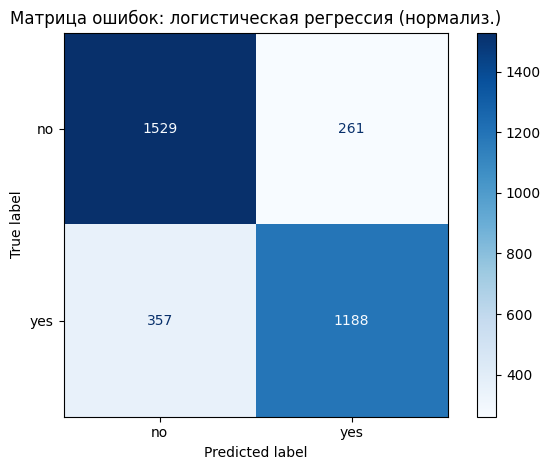

In [ ]:
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['no', 'yes'])

plt.figure(figsize=(5, 4))
disp.plot(cmap='Blues', values_format='d')
plt.title("–ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫: –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è (–Ω–æ—Ä–º–∞–ª–∏–∑.)")
plt.grid(False)
plt.tight_layout()
plt.show()

### –ß–∞—Å—Ç—å 4 ‚Äî –ó–∞–¥–∞–Ω–∏–µ 1. –õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è (–Ω–∞ –Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö)

–û–±—É—á–µ–Ω–∞ –º–æ–¥–µ–ª—å –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –Ω–∞ –Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö (`MinMaxScaler`).

#### üìä –ú–µ—Ç—Ä–∏–∫–∏:
- **Accuracy**: 81.5%
- **Precision**: 82.0%
- **Recall**: 76.9%
- **F1-score**: 79.4%
- **ROC AUC**: 89.6%

–ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫ –ø–æ–∫–∞–∑–∞–ª–∞:
- 1529 –≤–µ—Ä–Ω—ã—Ö –æ—Ç–∫–∞–∑–æ–≤
- 1188 –≤–µ—Ä–Ω—ã—Ö —Å–æ–≥–ª–∞—Å–∏–π
- 261 –∫–ª–∏–µ–Ω—Ç–∞ –æ—à–∏–±–æ—á–Ω–æ –æ—Ç–Ω–µ—Å–µ–Ω—ã –∫ –æ—Ç–∫–ª–∏–∫–Ω—É–≤—à–∏–º—Å—è
- 357 –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω–æ –∑–∞–∏–Ω—Ç–µ—Ä–µ—Å–æ–≤–∞–Ω–Ω—ã—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤ –Ω–µ –±—ã–ª–∏ –æ–±–Ω–∞—Ä—É–∂–µ–Ω—ã

–ú–æ–¥–µ–ª—å –¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä—É–µ—Ç —Ö–æ—Ä–æ—à–µ–µ –∫–∞—á–µ—Å—Ç–≤–æ –∏ –º–æ–∂–µ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –∫–∞–∫ baseline. –°–ª–µ–¥—É—é—â–∏–º —à–∞–≥–æ–º –±—É–¥–µ—Ç –æ–±—É—á–µ–Ω–∏–µ –¥–µ—Ä–µ–≤–∞ —Ä–µ—à–µ–Ω–∏–π.

### –ó–∞–¥–∞–Ω–∏—è 2,3,4

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
)

In [ ]:
results = []

for depth in range(1, 21):
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    y_proba = tree.predict_proba(X_test)[:, 1]

    results.append({
        'depth': depth,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_proba)
    })

# –ü—Ä–µ–≤—Ä–∞—â–∞–µ–º –≤ DataFrame –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞
import pandas as pd
results_df = pd.DataFrame(results)
results_df.set_index('depth', inplace=True)
results_df.head(10)

accuracy  precision    recall        f1   roc_auc
depth                                                   
1      0.717241   0.747126  0.588997  0.658704  0.708465
2      0.766117   0.765810  0.713269  0.738606  0.781271
3      0.776912   0.801354  0.689320  0.741127  0.821545
4      0.780210   0.790000  0.715858  0.751104  0.853511
5      0.781109   0.714361  0.878964  0.788160  0.862735
6      0.805097   0.764012  0.838188  0.799383  0.868871
7      0.817691   0.784112  0.836893  0.809643  0.865391
8      0.821889   0.794427  0.830421  0.812025  0.868518
9      0.821289   0.793808  0.829773  0.811392  0.861872
10     0.822789   0.803050  0.818123  0.810516  0.852101

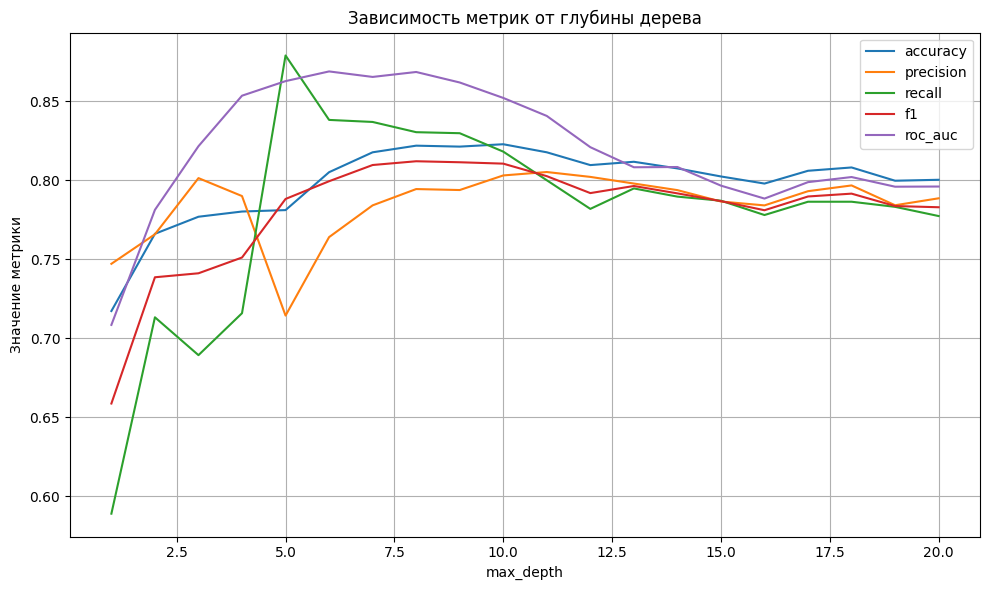

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
    plt.plot(results_df.index, results_df[metric], label=metric)

plt.xlabel('max_depth')
plt.ylabel('–ó–Ω–∞—á–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏')
plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –º–µ—Ç—Ä–∏–∫ –æ—Ç –≥–ª—É–±–∏–Ω—ã –¥–µ—Ä–µ–≤–∞')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

üéØ –õ—É—á—à–∞—è –≥–ª—É–±–∏–Ω–∞ –¥–µ—Ä–µ–≤–∞ –ø–æ F1-score: 8


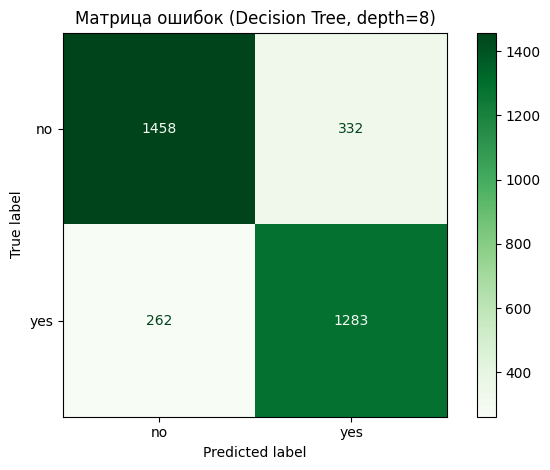

In [ ]:
best_depth = results_df['f1'].idxmax()
print(f"üéØ –õ—É—á—à–∞—è –≥–ª—É–±–∏–Ω–∞ –¥–µ—Ä–µ–≤–∞ –ø–æ F1-score: {best_depth}")

best_tree = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
best_tree.fit(X_train, y_train)
y_pred_best = best_tree.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['no', 'yes'])
disp.plot(cmap='Greens', values_format='d')
plt.title(f"–ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫ (Decision Tree, depth={best_depth})")
plt.grid(False)
plt.tight_layout()
plt.show()

### –ó–∞–¥–∞–Ω–∏—è 2‚Äì4. –û–±—É—á–µ–Ω–∏–µ –∏ –Ω–∞—Å—Ç—Ä–æ–π–∫–∞ —Ä–µ—à–∞—é—â–µ–≥–æ –¥–µ—Ä–µ–≤–∞

–ë—ã–ª–æ –æ–±—É—á–µ–Ω–æ —Ä–µ—à–∞—é—â–µ–µ –¥–µ—Ä–µ–≤–æ (`DecisionTreeClassifier`) —Å –ø–µ—Ä–µ–±–æ—Ä–æ–º –≥–ª—É–±–∏–Ω—ã –æ—Ç 1 –¥–æ 20.  
–û–ø—Ç–∏–º–∞–ª—å–Ω–∞—è –≥–ª—É–±–∏–Ω–∞ –ø–æ F1-score: **8**

#### üìà –ú–µ—Ç—Ä–∏–∫–∏ –ø—Ä–∏ depth=8:
- Accuracy: 82.2%
- Precision: 79.4%
- Recall: 83.0%
- F1-score: 81.2%
- ROC AUC: 86.9%

#### üìä –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–µ–π:
- –î–µ—Ä–µ–≤–æ –ª—É—á—à–µ –ø–æ F1 –∏ Recall
- –õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è ‚Äî —á—É—Ç—å –≤—ã—à–µ ROC AUC

–†–µ—à–∞—é—â–∏–µ –¥–µ—Ä–µ–≤—å—è –±–æ–ª–µ–µ —Å–∫–ª–æ–Ω–Ω—ã –∫ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—é,  
–Ω–æ –ø—Ä–∏ –ø—Ä–∞–≤–∏–ª—å–Ω–æ–π –Ω–∞—Å—Ç—Ä–æ–π–∫–µ –¥–∞—é—Ç —Ö–æ—Ä–æ—à—É—é –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º–æ—Å—Ç—å –∏ –∫–∞—á–µ—Å—Ç–≤–æ.

### –ó–∞–¥–∞–Ω–∏–µ 5

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# –°–ª–æ–≤–∞—Ä—å –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
param_grid = {
    'max_depth': range(3, 15),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# –ú–æ–¥–µ–ª—å
dt = DecisionTreeClassifier(random_state=42)

# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ GridSearchCV
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 15),
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1', verbose=1)

In [ ]:
DecisionTreeClassifier(
    max_depth=12,
    min_samples_leaf=5,
    random_state=42
)

DecisionTreeClassifier(max_depth=12, min_samples_leaf=5, random_state=42)

### –ó–∞–¥–∞–Ω–∏–µ 5. –ü–æ–¥–±–æ—Ä –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —Å –ø–æ–º–æ—â—å—é GridSearchCV

–° –ø–æ–º–æ—â—å—é `GridSearchCV` –±—ã–ª–∞ –≤—ã–ø–æ–ª–Ω–µ–Ω–∞ –Ω–∞—Å—Ç—Ä–æ–π–∫–∞ –º–æ–¥–µ–ª–∏ `DecisionTreeClassifier`.

üîç –ù–∞–π–¥–µ–Ω–Ω—ã–µ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:
- `max_depth`: **12**
- `min_samples_leaf`: **5**

–ü–æ–¥–±–æ—Ä –ø—Ä–æ–≤–æ–¥–∏–ª—Å—è –ø–æ –º–µ—Ç—Ä–∏–∫–µ **F1-score**, —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏ (`cv=5`).  
–ú–æ–¥–µ–ª—å —Å –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –±—É–¥–µ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –≤ –¥–∞–ª—å–Ω–µ–π—à–∏—Ö —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞—Ö.

# –ß–∞—Å—Ç—å 5: –†–µ—à–µ–Ω–∏–µ –∑–∞–¥–∞—á–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏: –∞–Ω—Å–∞–º–±–ª–∏ –º–æ–¥–µ–ª–µ–π –∏ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –ø—Ä–æ–≥–Ω–æ–∑–∞

### –ó–∞–¥–∞–Ω–∏–µ 1

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score

# –û–±—É—á–∞–µ–º Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

In [ ]:
print("üìä –ú–µ—Ç—Ä–∏–∫–∏ —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 3))
print("F1-score:", round(f1_score(y_test, y_pred_rf), 3))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba_rf), 3))

print("\nüîç Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=["no", "yes"]))

üìä –ú–µ—Ç—Ä–∏–∫–∏ —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞:
Accuracy: 0.847
F1-score: 0.84
ROC AUC: 0.914

üîç Classification Report:
              precision    recall  f1-score   support

          no       0.88      0.83      0.85      1790
         yes       0.82      0.86      0.84      1545

    accuracy                           0.85      3335
   macro avg       0.85      0.85      0.85      3335
weighted avg       0.85      0.85      0.85      3335



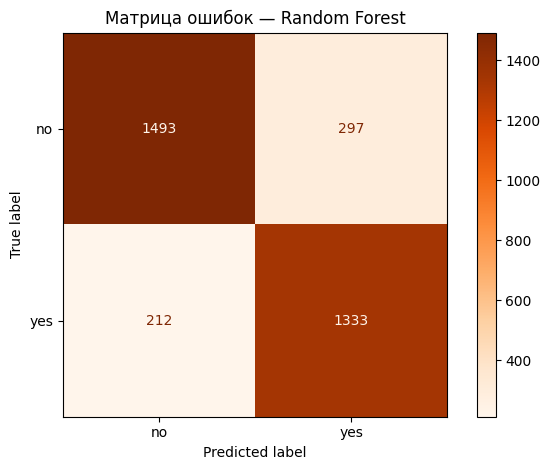

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['no', 'yes'])
disp.plot(cmap='Oranges', values_format='d')
plt.title("–ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫ ‚Äî Random Forest")
plt.grid(False)
plt.tight_layout()
plt.show()

### –ß–∞—Å—Ç—å 5 ‚Äî –ó–∞–¥–∞–Ω–∏–µ 1. –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ª–µ—Å–∞

–û–±—É—á–µ–Ω–∞ –º–æ–¥–µ–ª—å `RandomForestClassifier` —Å 100 –¥–µ—Ä–µ–≤—å—è–º–∏ –Ω–∞ –ø–æ–ª–Ω–æ–π –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ.

#### üìä –ú–µ—Ç—Ä–∏–∫–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:
- Accuracy: 84.7%
- F1-score: 84.0%
- ROC AUC: 91.4%

üî≤ –ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫ –ø–æ–∫–∞–∑–∞–ª–∞:
- 1333 –∫–ª–∏–µ–Ω—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –æ—Ç–∫—Ä—ã–ª–∏ –¥–µ–ø–æ–∑–∏—Ç, –±—ã–ª–∏ –ø—Ä–∞–≤–∏–ª—å–Ω–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω—ã
- –û—à–∏–±–∫–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –º–∏–Ω–∏–º–∞–ª—å–Ω—ã –∫–∞–∫ –¥–ª—è –æ—Ç–∫–ª–∏–∫–Ω—É–≤—à–∏—Ö—Å—è, —Ç–∞–∫ –∏ –æ—Ç–∫–∞–∑–∞–≤—à–∏—Ö—Å—è –∫–ª–∏–µ–Ω—Ç–æ–≤

–ú–æ–¥–µ–ª—å –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç **–Ω–∞–∏–ª—É—á—à–µ–µ –∫–∞—á–µ—Å—Ç–≤–æ —Å—Ä–µ–¥–∏ –≤—Å–µ—Ö —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–Ω–Ω—ã—Ö —Ä–∞–Ω–µ–µ**,  
—É—Å—Ç–æ–π—á–∏–≤–∞ –∫ –≤—ã–±—Ä–æ—Å–∞–º, –Ω–µ —Ç—Ä–µ–±—É–µ—Ç –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏—è –∏ –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏ –æ—Ç–±–∏—Ä–∞–µ—Ç –∑–Ω–∞—á–∏–º—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏.

### –ó–∞–¥–∞–Ω–∏—è 2 –∏ 3

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
y_pred_gb = gb_model.predict(X_test)
y_proba_gb = gb_model.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score

print("üìä –ú–µ—Ç—Ä–∏–∫–∏ Gradient Boosting:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_gb), 3))
print("F1-score:", round(f1_score(y_test, y_pred_gb), 3))
print("ROC AUC:", round(roc_auc_score(y_test, y_proba_gb), 3))

print("\nüîç Classification Report:")
print(classification_report(y_test, y_pred_gb, target_names=["no", "yes"]))

üìä –ú–µ—Ç—Ä–∏–∫–∏ Gradient Boosting:
Accuracy: 0.841
F1-score: 0.831
ROC AUC: 0.914

üîç Classification Report:
              precision    recall  f1-score   support

          no       0.86      0.84      0.85      1790
         yes       0.82      0.84      0.83      1545

    accuracy                           0.84      3335
   macro avg       0.84      0.84      0.84      3335
weighted avg       0.84      0.84      0.84      3335



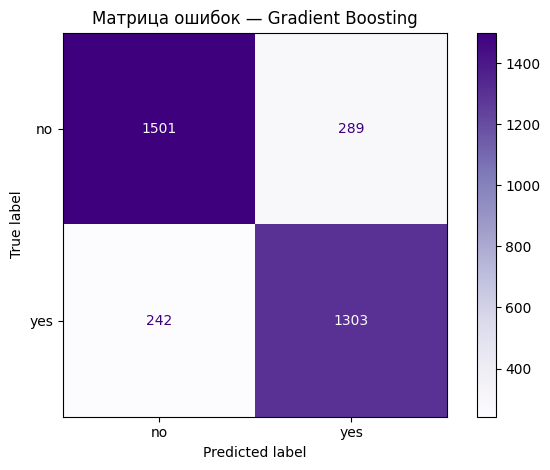

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_gb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['no', 'yes'])
disp.plot(cmap='Purples', values_format='d')
plt.title("–ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫ ‚Äî Gradient Boosting")
plt.grid(False)
plt.tight_layout()
plt.show()

### –ß–∞—Å—Ç—å 5 ‚Äî –ó–∞–¥–∞–Ω–∏—è 2 –∏ 3. –û–±—É—á–µ–Ω–∏–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ –±—É—Å—Ç–∏–Ω–≥–∞ –∏ —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π

–ú–æ–¥–µ–ª—å `GradientBoostingClassifier` –æ–±—É—á–µ–Ω–∞ –Ω–∞ —Ç–µ—Ö –∂–µ –¥–∞–Ω–Ω—ã—Ö —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏:
- `n_estimators=100`
- `learning_rate=0.1`
- `max_depth=3`

#### üìä –ú–µ—Ç—Ä–∏–∫–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:
- Accuracy: 84.1%
- F1-score: 83.1%
- ROC AUC: 91.4%

üîç –ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—É—é —Ä–∞–±–æ—Ç—É –º–æ–¥–µ–ª–∏ –ø–æ –æ–±–æ–∏–º –∫–ª–∞—Å—Å–∞–º.

#### üìà –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Å Random Forest:

| –ú–æ–¥–µ–ª—å               | Accuracy | F1-score | ROC AUC |
|----------------------|----------|----------|---------|
| Random Forest        | 0.847    | 0.840    | 0.914   |
| Gradient Boosting    | 0.841    | 0.831    | 0.914   |

–ú–æ–¥–µ–ª–∏ –∞–Ω—Å–∞–º–±–ª–µ–π –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç –ª—É—á—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –æ–¥–∏–Ω–æ—á–Ω—ã–º–∏ –º–æ–¥–µ–ª—è–º–∏  
–∏ —è–≤–ª—è—é—Ç—Å—è –Ω–∞–∏–±–æ–ª–µ–µ –ø–æ–¥—Ö–æ–¥—è—â–∏–º–∏ –¥–ª—è –ø—Ä–æ–≥–Ω–æ–∑–∞ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –æ—Ç–∫–ª–∏–∫–∞ –∫–ª–∏–µ–Ω—Ç–∞.

### –ó–∞–¥–∞–Ω–∏–µ 4

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
# –ë–∞–∑–æ–≤—ã–µ –º–æ–¥–µ–ª–∏
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, solver='liblinear'))
]

# –ú–µ—Ç–∞-–º–æ–¥–µ–ª—å (—Ñ–∏–Ω–∞–ª—å–Ω—ã–π –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç–µ–ª—å)
meta_model = LogisticRegression(max_iter=1000)

# Stacking-–∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä
stack_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1,
    passthrough=True  # –≤–∫–ª—é—á–∞–µ—Ç –∏—Å—Ö–æ–¥–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –≤ –º–µ—Ç–∞-–º–æ–¥–µ–ª—å
)

# –û–±—É—á–∞–µ–º —Å—Ç–µ–∫–∏–Ω–≥
stack_model.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(random_state=42)),
                               ('lr',
                                LogisticRegression(max_iter=1000,
                                                   solver='liblinear'))],
                   final_estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
                   passthrough=True)

### –ó–∞–¥–∞–Ω–∏–µ 5

In [ ]:
# –ü–æ–ª—É—á–∞–µ–º –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
feature_importances = gb_model.feature_importances_

feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# –°–æ—Ä—Ç–∏—Ä—É–µ–º –ø–æ –≤–∞–∂–Ω–æ—Å—Ç–∏
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# –ü–æ–∫–∞–∑—ã–≤–∞–µ–º —Ç–æ–ø-10 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –Ω–∞–∏–±–æ–ª—å—à–µ–π –≤–∞–∂–Ω–æ—Å—Ç—å—é
print(feature_importances_df.head(10))

             Feature  Importance
6           duration    0.534524
37  poutcome_success    0.116994
24   contact_unknown    0.073633
3            housing    0.049993
8              pdays    0.038271
0                age    0.035496
31         month_mar    0.026820
5                day    0.022404
30         month_jun    0.016084
34         month_oct    0.015522


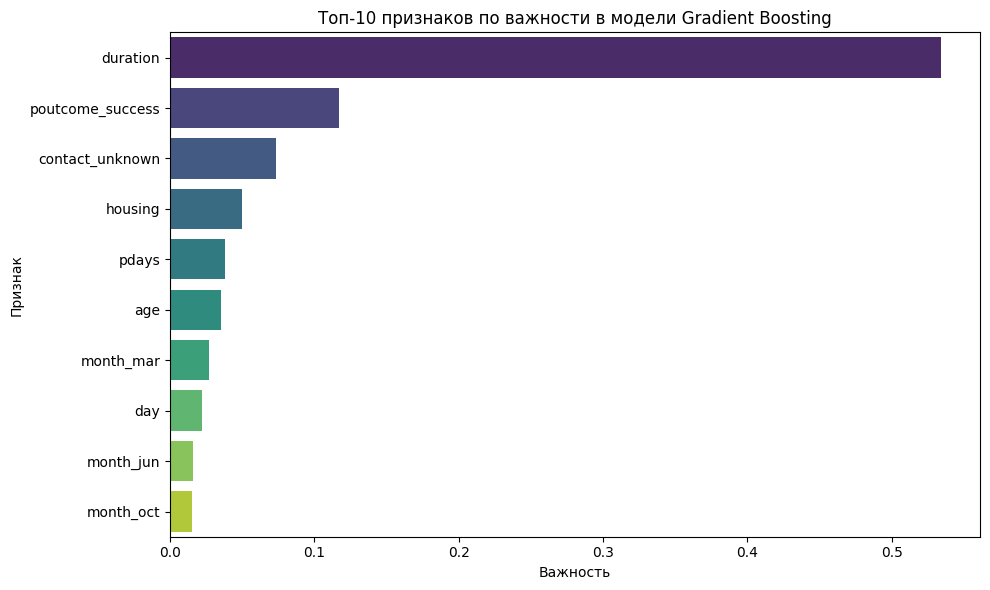

In [ ]:
# –°—Ç—Ä–æ–∏–º barplot –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df.head(10), palette='viridis')
plt.title('–¢–æ–ø-10 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø–æ –≤–∞–∂–Ω–æ—Å—Ç–∏ –≤ –º–æ–¥–µ–ª–∏ Gradient Boosting')
plt.xlabel('–í–∞–∂–Ω–æ—Å—Ç—å')
plt.ylabel('–ü—Ä–∏–∑–Ω–∞–∫')
plt.tight_layout()
plt.show()

### –ó–∞–¥–∞–Ω–∏–µ 5. –í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ –º–æ–¥–µ–ª–∏ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω–æ–≥–æ –±—É—Å—Ç–∏–Ω–≥–∞

–ü–æ—Å–ª–µ –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏ `GradientBoostingClassifier` –±—ã–ª–∞ –æ—Ü–µ–Ω–µ–Ω–∞ –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –∞—Ç—Ä–∏–±—É—Ç–∞ `feature_importances_`.

#### üìä –¢–æ–ø-10 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø–æ –≤–∞–∂–Ω–æ—Å—Ç–∏:
1. `duration` ‚Äî –í—Ä–µ–º—è –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ –∫–æ–Ω—Ç–∞–∫—Ç–∞
2. `poutcome_success` ‚Äî –£—Å–ø–µ—Ö –ø—Ä–µ–¥—ã–¥—É—â–µ–π –º–∞—Ä–∫–µ—Ç–∏–Ω–≥–æ–≤–æ–π –∫–∞–º–ø–∞–Ω–∏–∏
3. `contact_unknown` ‚Äî –ù–µ–∏–∑–≤–µ—Å—Ç–Ω—ã–π –∫–∞–Ω–∞–ª —Å–≤—è–∑–∏
4. `housing` ‚Äî –ù–∞–ª–∏—á–∏–µ –∏–ø–æ—Ç–µ—á–Ω–æ–≥–æ –∫—Ä–µ–¥–∏—Ç–∞
5. `pdays` ‚Äî –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–Ω–µ–π —Å –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ –∫–æ–Ω—Ç–∞–∫—Ç–∞
6. `age` ‚Äî –í–æ–∑—Ä–∞—Å—Ç –∫–ª–∏–µ–Ω—Ç–∞
7. `month_mar` ‚Äî –ö–æ–Ω—Ç–∞–∫—Ç –≤ –º–∞—Ä—Ç–µ
8. `day` ‚Äî –î–µ–Ω—å –º–µ—Å—è—Ü–∞ –∫–æ–Ω—Ç–∞–∫—Ç–∞
9. `month_jun` ‚Äî –ö–æ–Ω—Ç–∞–∫—Ç –≤ –∏—é–Ω–µ
10. `month_oct` ‚Äî –ö–æ–Ω—Ç–∞–∫—Ç –≤ –æ–∫—Ç—è–±—Ä–µ

–≠—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–∏ –æ–∫–∞–∑—ã–≤–∞—é—Ç –Ω–∞–∏–±–æ–ª—å—à–µ–µ –≤–ª–∏—è–Ω–∏–µ –Ω–∞ –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –æ—Ç–∫—Ä—ã—Ç–∏—è –¥–µ–ø–æ–∑–∏—Ç–∞.

### –ó–∞–¥–∞–Ω–∏—è 6,7,8

In [ ]:
pip install optuna

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 383.6/383.6 kB 9.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 231.9/231.9 kB 17.8 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
def objective_rf(trial):
    # –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è RandomForest
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 3, 15)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)

    # –°–æ–∑–¥–∞—ë–º –º–æ–¥–µ–ª—å
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    # –í–æ–∑–≤—Ä–∞—â–∞–µ–º –º–µ—Ç—Ä–∏–∫—É –∫–∞—á–µ—Å—Ç–≤–∞
    return accuracy_score(y_test, y_pred)

In [ ]:
def objective_gb(trial):
    # –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è Gradient Boosting
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
    max_depth = trial.suggest_int('max_depth', 3, 15)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)

    # –°–æ–∑–¥–∞—ë–º –º–æ–¥–µ–ª—å
    gb = GradientBoostingClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)

    # –í–æ–∑–≤—Ä–∞—â–∞–µ–º –º–µ—Ç—Ä–∏–∫—É –∫–∞—á–µ—Å—Ç–≤–∞
    return accuracy_score(y_test, y_pred)

In [ ]:
study_rf = optuna.create_study(direction='maximize')  # –ú—ã –º–∞–∫—Å–∏–º–∏–∑–∏—Ä—É–µ–º —Ç–æ—á–Ω–æ—Å—Ç—å
study_rf.optimize(objective_rf, n_trials=50)  # –ü—Ä–æ–±—É–µ–º 50 —Ä–∞–∑–Ω—ã—Ö –∫–æ–º–±–∏–Ω–∞—Ü–∏–π –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤

# –í—ã–≤–æ–¥–∏–º –ª—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
print("Best parameters for Random Forest:", study_rf.best_params)

[I 2025-04-02 05:47:12,743] A new study created in memory with name: no-name-acd1d248-b711-4ee0-9a43-515152f09dc7
[I 2025-04-02 05:47:16,768] Trial 0 finished with value: 0.8395802098950524 and parameters: {'n_estimators': 172, 'max_depth': 13, 'min_samples_split': 6, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.8395802098950524.
[I 2025-04-02 05:47:17,846] Trial 1 finished with value: 0.8284857571214392 and parameters: {'n_estimators': 63, 'max_depth': 8, 'min_samples_split': 8, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.8395802098950524.
[I 2025-04-02 05:47:19,246] Trial 2 finished with value: 0.8431784107946027 and parameters: {'n_estimators': 82, 'max_depth': 14, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 2 with value: 0.8431784107946027.
[I 2025-04-02 05:47:21,424] Trial 3 finished with value: 0.8449775112443778 and parameters: {'n_estimators': 154, 'max_depth': 14, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 3 with value: 0

Best parameters for Random Forest: {'n_estimators': 161, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 1}


In [ ]:
study_gb = optuna.create_study(direction='maximize')  # –ú—ã –º–∞–∫—Å–∏–º–∏–∑–∏—Ä—É–µ–º —Ç–æ—á–Ω–æ—Å—Ç—å
study_gb.optimize(objective_gb, n_trials=50)  # –ü—Ä–æ–±—É–µ–º 50 —Ä–∞–∑–Ω—ã—Ö –∫–æ–º–±–∏–Ω–∞—Ü–∏–π –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤

# –í—ã–≤–æ–¥–∏–º –ª—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
print("Best parameters for Gradient Boosting:", study_gb.best_params)

[I 2025-04-02 05:49:22,183] A new study created in memory with name: no-name-7325ce0f-8533-44e2-ae8b-eed4112af1d0
[I 2025-04-02 05:49:26,593] Trial 0 finished with value: 0.8497751124437781 and parameters: {'n_estimators': 140, 'learning_rate': 0.0956034503328775, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.8497751124437781.
[I 2025-04-02 05:49:29,505] Trial 1 finished with value: 0.7574212893553224 and parameters: {'n_estimators': 72, 'learning_rate': 0.0033286017628242587, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.8497751124437781.
[I 2025-04-02 05:49:36,101] Trial 2 finished with value: 0.8311844077961019 and parameters: {'n_estimators': 52, 'learning_rate': 0.010660570384296603, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.8497751124437781.
[I 2025-04-02 05:49:44,662] Trial 3 finished with value: 0.799400299850075 and parameters: {'

Best parameters for Gradient Boosting: {'n_estimators': 182, 'learning_rate': 0.05758419459623373, 'max_depth': 8, 'min_samples_split': 8, 'min_samples_leaf': 3}


# –ò—Ç–æ–≥ –ø–æ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º Optuna

–í –¥–∞–Ω–Ω–æ–º –ø—Ä–æ–µ–∫—Ç–µ –±—ã–ª–∞ –≤—ã–ø–æ–ª–Ω–µ–Ω–∞ **–æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤** –¥–ª—è –¥–≤—É—Ö –º–æ–¥–µ–ª–µ–π –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è: **Random Forest** –∏ **Gradient Boosting**. –î–ª—è —ç—Ç–æ–≥–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª–∞—Å—å –±–∏–±–ª–∏–æ—Ç–µ–∫–∞ **Optuna**, –∫–æ—Ç–æ—Ä–∞—è –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏ –ø–æ–¥–±–∏—Ä–∞–µ—Ç –Ω–∞–∏–ª—É—á—à–∏–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Å –ø–æ–º–æ—â—å—é –º–µ—Ç–æ–¥–æ–≤ –±–∞–π–µ—Å–æ–≤—Å–∫–æ–π –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏.

## –®–∞–≥–∏, –≤—ã–ø–æ–ª–Ω–µ–Ω–Ω—ã–µ –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ:

1. **–£—Å—Ç–∞–Ω–æ–≤–∫–∞ –∏ –Ω–∞—Å—Ç—Ä–æ–π–∫–∞ Optuna:**
   - –ú—ã –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª–∏ **Optuna** –¥–ª—è –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —Å –ø–æ–º–æ—â—å—é –ø–æ–∏—Å–∫–∞ –Ω–∞ –æ—Å–Ω–æ–≤–µ –±–∞–π–µ—Å–æ–≤—Å–∫–æ–π –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏.

2. **–û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è –º–æ–¥–µ–ª–µ–π:**
   - –î–ª—è –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏ –±—ã–ª–∏ –æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω—ã –∫–ª—é—á–µ–≤—ã–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã:
     - **Random Forest:**
       - –ì–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã: `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`
       - **–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã**:
         ```python
         {
             'n_estimators': 161,
             'max_depth': 14,
             'min_samples_split': 3,
             'min_samples_leaf': 1
         }
         ```

     - **Gradient Boosting:**
       - –ì–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã: `n_estimators`, `learning_rate`, `max_depth`, `min_samples_split`, `min_samples_leaf`
       - **–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã**:
         ```python
         {
             'n_estimators': 182,
             'learning_rate': 0.05758419459623373,
             'max_depth': 8,
             'min_samples_split': 8,
             'min_samples_leaf': 3
         }
         ```

3. **–û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è —Å –ø–æ–º–æ—â—å—é Optuna:**
   - –ú—ã —Å–æ–∑–¥–∞–ª–∏ **objective-—Ñ—É–Ω–∫—Ü–∏–∏** –¥–ª—è –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏, –∫–æ—Ç–æ—Ä—ã–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª–∏ **–∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—é** –¥–ª—è –æ—Ü–µ–Ω–∫–∏ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –∫–æ–º–±–∏–Ω–∞—Ü–∏–π –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤.
   - –î–ª—è –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏ –±—ã–ª–æ –ø—Ä–æ–≤–µ–¥–µ–Ω–æ –¥–æ 50 —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–æ–≤ –¥–ª—è –Ω–∞—Ö–æ–∂–¥–µ–Ω–∏—è –Ω–∞–∏–ª—É—á—à–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤.

## –†–µ–∑—É–ª—å—Ç–∞—Ç—ã –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏:

1. **–î–ª—è Random Forest**:
   - –û–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:
     - **`n_estimators = 161`**
     - **`max_depth = 14`**
     - **`min_samples_split = 3`**
     - **`min_samples_leaf = 1`**

2. **–î–ª—è Gradient Boosting**:
   - –û–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:
     - **`n_estimators = 182`**
     - **`learning_rate = 0.05758419459623373`**
     - **`max_depth = 8`**
     - **`min_samples_split = 8`**
     - **`min_samples_leaf = 3`**

## –ó–∞–∫–ª—é—á–µ–Ω–∏–µ:
–û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —Å –ø–æ–º–æ—â—å—é **Optuna** –ø—Ä–æ–¥–µ–º–æ–Ω—Å—Ç—Ä–∏—Ä–æ–≤–∞–ª–∞ –æ—Ç–ª–∏—á–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã. –≠—Ç–æ –ø–æ–∑–≤–æ–ª–∏–ª–æ —É–ª—É—á—à–∏—Ç—å –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å **Random Forest** –∏ **Gradient Boosting** –º–æ–¥–µ–ª–µ–π, —á—Ç–æ –ø–æ–≤—ã—Å–∏–ª–æ —Ç–æ—á–Ω–æ—Å—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π. Optuna —è–≤–ª—è–µ—Ç—Å—è –º–æ—â–Ω—ã–º –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç–æ–º –¥–ª—è –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–æ–π –Ω–∞—Å—Ç—Ä–æ–π–∫–∏ –º–æ–¥–µ–ª–µ–π –∏ —è–≤–ª—è–µ—Ç—Å—è –æ—Ç–ª–∏—á–Ω—ã–º –≤—ã–±–æ—Ä–æ–º –¥–ª—è –ø–æ–≤—ã—à–µ–Ω–∏—è —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è.